# Leaf Diagnosis

# Import Statements

In [17]:
#from google.colab import files, drive
import pandas as pd
import numpy as np
#from scipy.io import wavfile
#import plotly.express as px
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image 

In [2]:
#! pip install kaggle
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json

In [14]:
#! kaggle datasets download -d sadmansakibmahi/plant-disease-expert
! kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100%|█████████████████████████████████████▉| 2.70G/2.70G [01:42<00:00, 32.4MB/s]
100%|██████████████████████████████████████| 2.70G/2.70G [01:43<00:00, 28.1MB/s]


In [13]:
#!unzip plant-disease-expert.zip -d plant-disease-expert

In [15]:
! kaggle datasets download -d shashwatwork/identifying-disease-in-tea-leafs

100%|███████████████████████████████████████▊| 738M/740M [00:30<00:00, 30.2MB/s]
100%|████████████████████████████████████████| 740M/740M [00:30<00:00, 25.3MB/s]


In [333]:
!unzip -qq new-plant-diseases-dataset.zip -d new-plant-diseases-dataset

In [334]:
!unzip -qq identifying-disease-in-tea-leafs.zip -d identifying-disease-in-tea-leafs

## Read the Data

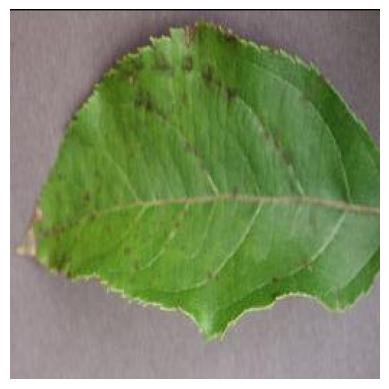

In [6]:
# Read first image file
file_path = 'new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/'#'plant-disease-expert/Image Data base/Image Data base/Apple Apple scab/'
file_name = '0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_90deg.JPG'#'Apple_Apple_scab10.jpg'
image = plt.imread(file_path+file_name)
plt.imshow(image)
plt.axis("off")
plt.show()

# samp_frequency, wav = wavfile.read(file_path+file_name)

# Tensor Board

#####Visualize the model performance and statistics from tensorflow settings.

In [411]:
# load tensorboard
#%load_ext tensorboard
# start tensorboard inside the notebook. Outside of the notebook, 
# use tensorboard --logdir=./logs
#%tensorboard --logdir=./logs

plan

0. load datasets
0.1. use new plant diseases or combine plant diseases with tea dataset
0.2 list folders
0.2 labeling
correct lebeling
how many images pro label
1. size distribution - need rescaling?
2. analyse image simillarity https://www.analyticsvidhya.com/blog/2021/05/beginners-guide-to-image-and-text-similarity/
2.1. see if some images are different and can be removed - like ginger 
2.2. what kind of differences are noticible?
3. combine and redistribute the train/div/test data - 60/20/20

## Analyse Data

### image size distribution

In [8]:
def analysesize(folder_path, graph=False):
    size_images = dict()
    size256x256 = 0

    for rpath, _, filenames in os.walk(folder_path,topdown=True):
        #for d in filenames:
            #print(rpath, d)
        for path_image in filenames:
            image = os.path.abspath(os.path.join(rpath, path_image))
            with Image.open(image,mode="r") as img:
                width, heigth = img.size
                #print(width)
                if width!= 256 and heigth!=256:
                    size_images[path_image] = {'width': width, 'heigth': heigth}
                else: size256x256 +=1
    #print(size_images)
    print('there are ', size256x256 ,' of images in 256x256px')
    print('there are ', len(size_images), ' images of other dimensions')
    
    if size_images and graph==True:
        image_width = [v['width'] for v in size_images.values()]
        image_heigth = [v['heigth'] for v in size_images.values()]
        print('dimenstion of width: ', min(image_width), 'px - ', max(image_width), 'px')
        print('smallest dimenstion of hight: ', min(image_width), 'px -', max(image_width), 'px')
        plt.style.use('default')
        plt.figure(figsize=(5, 5))
        plt.scatter(image_width,image_heigth)
        #plt.hist(image_heigth, bins=100)

#print(plt.style.available)

In [879]:
folder_plant_diseases_expert = 'plant-disease-expert/Image Data base/Image Data base/'
analysesize(folder_plant_diseases_expert, graph=True)

there are  194571  of images in 256x256px
there are  5094  images of other dimensions
dimenstion of width:  93 px -  5184 px
smallest dimenstion of hight:  93 px - 5184 px


there are  0  of images in 256x256px
there are  884  images of other dimensions
dimenstion of width:  768 px -  4160 px
smallest dimenstion of hight:  768 px - 4160 px


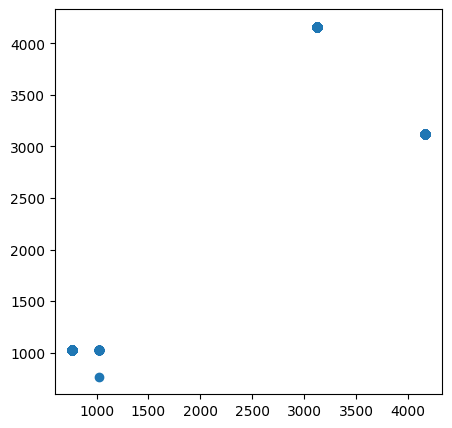

In [13]:
folder_tea = 'identifying-disease-in-tea-leafs/tea sickness dataset/'
analysesize(folder_tea, graph=True)

In [9]:
folder_plant_diseases_new = 'new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/'
analysesize(folder_plant_diseases_new, graph=True)

there are  70295  of images in 256x256px
there are  0  images of other dimensions


In [10]:
folder_plant_diseases_new_valid ='new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/'
analysesize(folder_plant_diseases_new_valid, graph=True)

there are  17572  of images in 256x256px
there are  0  images of other dimensions


### data distribution pro label

In [412]:
folders = os.listdir(folder_plant_diseases_new)
images_pro_class = dict()

for folder in folders:
    current_folder = os.path.join(folder_plant_diseases_new,folder)
    #print(folder,' contains ', len(os.listdir(current_folder)), 'images')
    images_pro_class[folder] = {'images':len(os.listdir(current_folder))} #{'no_of_img': len(os.listdir(current_folder))}
    
#images_pro_class
images_pro_class = dict( sorted(images_pro_class.items(), key=lambda x: x[0].lower()) )
#images_pro_class

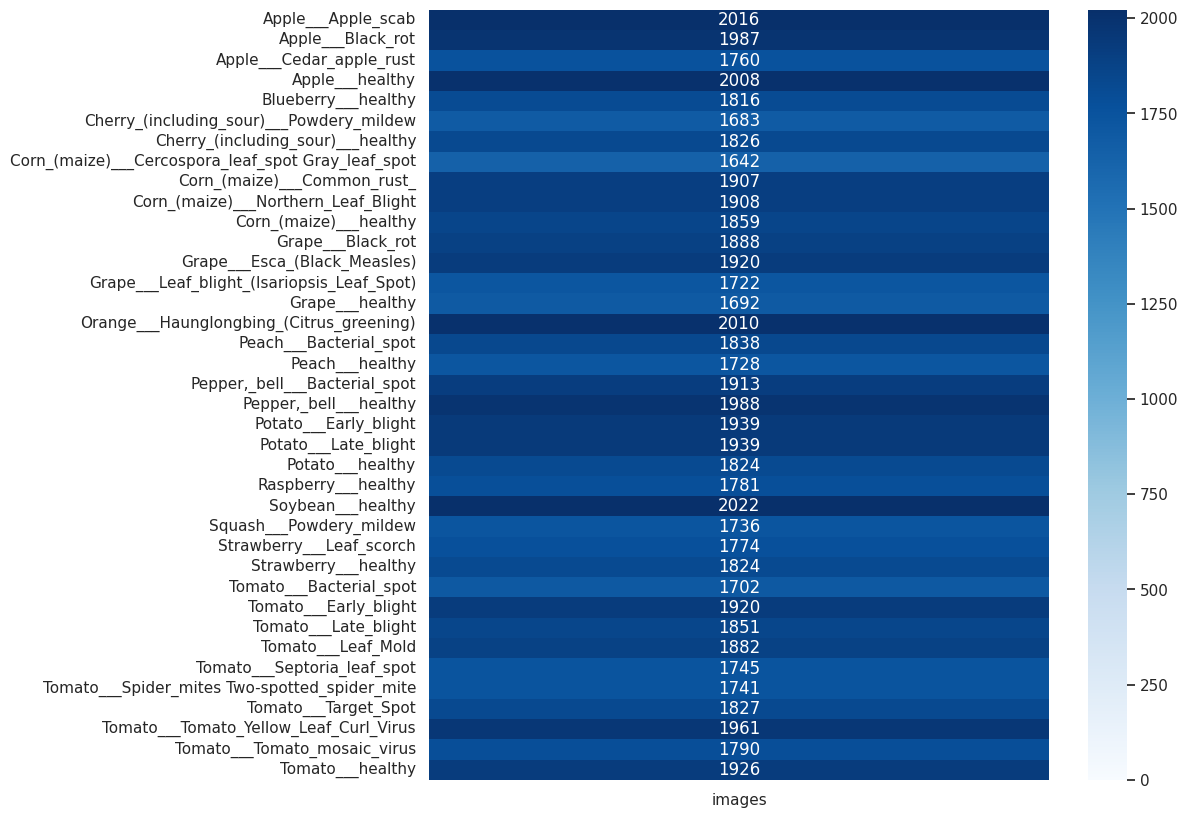

In [415]:
import seaborn as sns
sns.set(rc={"figure.figsize":(10,10)})

df = pd.DataFrame.from_dict(images_pro_class,orient='index')
df
g = sns.heatmap(df, vmin=0, cmap="Blues", annot=True, fmt='g')


## labeles

In [11]:
sub_folders_plant_diseases = [name for name in os.listdir(folder_plant_diseases_new) if os.path.isdir(os.path.join(folder_plant_diseases_new, name))]
print(len(sub_folders_plant_diseases))
sorted(sub_folders_plant_diseases, key=lambda x: x[0].lower())

38


['Apple___Black_rot',
 'Apple___healthy',
 'Apple___Cedar_apple_rust',
 'Apple___Apple_scab',
 'Blueberry___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Common_rust_',
 'Cherry_(including_sour)___Powdery_mildew',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Black_rot',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Potato___Late_blight',
 'Peach___healthy',
 'Potato___healthy',
 'Pepper,_bell___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Peach___Bacterial_spot',
 'Potato___Early_blight',
 'Raspberry___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Squash___Powdery_mildew',
 'Soybean___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___healthy',
 'Tomato

In [14]:
sub_folders_tea = [name for name in os.listdir(folder_tea) if os.path.isdir(os.path.join(folder_tea, name))]
print(len(sub_folders_tea))
sub_folders_tea

8


['Anthracnose',
 'bird eye spot',
 'healthy',
 'algal leaf',
 'white spot',
 'brown blight',
 'gray light',
 'red leaf spot']

## Merge data 

In [12]:
# rename Tea data
#for folder in os.listdir(folder_tea):
#  os.rename(f'{folder_tea + folder}', f'{folder_plant_diseases_new + "Tea___" + folder.replace(" ", "_")}')

In [13]:
# copy validation data to one folder
#folder_plant_diseases_new_validation='new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/'


In [147]:
#print(f'{folder_plant_diseases_new + "Tea___" + folder.replace(" ", "_")}')

new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tea___red_leaf_spot


## Create dataset from directory

In [15]:
train_dir = folder_plant_diseases_new 
valid_dir = folder_plant_diseases_new_valid
#train_dir ='new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/'
#valid_dir ='new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/'

In [18]:
train_datagen = ImageDataGenerator(    
    rescale=1./255)

validation_datagen = ImageDataGenerator(
    rescale=1./255,                                    
    validation_split=0.5
)

#DATA:
train_set = train_datagen.flow_from_directory(
          train_dir,
          target_size=(256,256),
          keep_aspect_ratio=True,
          batch_size=64,
          seed=101, 
          shuffle=True,
          class_mode='categorical'
          )

test_set = validation_datagen.flow_from_directory(
          valid_dir,
          target_size=(256,256),
          keep_aspect_ratio=True,
          batch_size=64,
          shuffle=False,
          # seed=101,
          class_mode='categorical',
          subset = "training")

validation_set = validation_datagen.flow_from_directory(
          valid_dir,
          target_size=(256,256),
          keep_aspect_ratio=True,
          batch_size=64,
          shuffle=True,
          # seed=101,
          class_mode='categorical',
          subset = "validation") 

Found 70295 images belonging to 38 classes.
Found 8795 images belonging to 38 classes.
Found 8777 images belonging to 38 classes.


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create dataset with generator -> outputs directory iterator

def image_generator():


    train_datagen = ImageDataGenerator(rescale=1./255)
    
    # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
    #               Pick the one that better suits here given that the labels are going to be 1D binary labels.
    train_generator = train_datagen.flow_from_directory(directory= folder_plant_diseases_new,
                                                        target_size=(256, 256),
                                                        batch_size=64,
                                                        shuffle=True,
                                                        keep_aspect_ratio=True,
                                                        class_mode="categorical")
                                                        #class_mode="categorical")


    return train_generator
    

data = image_generator()

## Train data

In [19]:
# define callbacks
class Callback_on_acc(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.95:
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [20]:
#data.n
print('number of data for training:', train_set.n)
print('number of classes:', len(train_set.class_indices.keys()))

number of data for training: 70295
number of classes: 38


In [21]:
no_of_classes = len(train_set.class_indices.keys())
print('number of nods in output layer: ', no_of_classes)

number of nods in output layer:  38


In [22]:
#for a batch:
imgs, labels = next(train_set)#data)
len(labels)#[100]

64

In [23]:
#data.classes#[0:10]

In [52]:
def plotImages(images_arr):
    fig, axes = plt.subplots(4,8, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


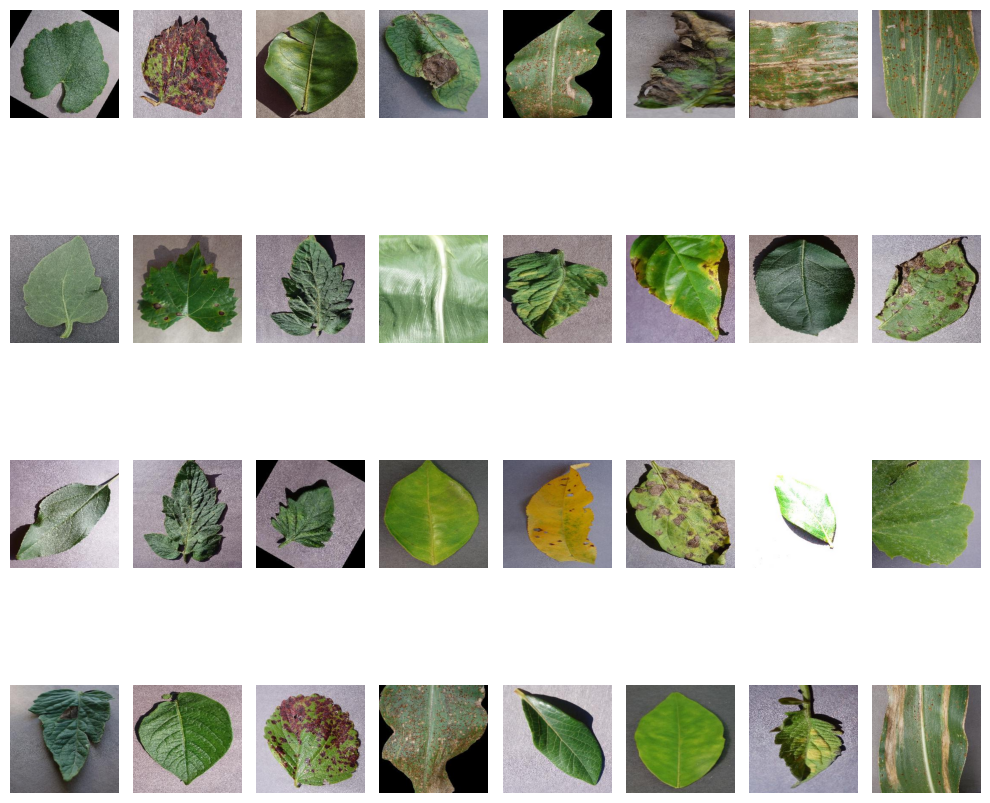

In [51]:
images_to_plot = range(0,32,1)
plotImages(imgs[images_to_plot])#[10:20])
print(labels[images_to_plot])#[0:10])

## Simple CNN Model

In [34]:
# PARAMETERS
train_generator = train_set
val_data = validation_set
output_layer = no_of_classes
no_epochs = 100
validation_steps = 10
validation_freq = 5
steps_per_epoch= 10

In [35]:
# DEFINE MODEL
#def train_simple_model(train_generator,val_data, no_of_classes, no_epochs):

    # Instantiate the callback
callbacks = Callback_on_acc()
    # do we need a callback?

    # Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(127, 127, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(62, 62, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    #tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
])
    

    # Compile the model
model.compile(loss='categorical_crossentropy',#'binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),#tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy', 'mae'])
    
model.summary()    


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

In [489]:
    # Train the model
history = model.fit(train_generator,
                        validation_data= val_data,
                        validation_steps = validation_steps,
                        validation_freq = validation_freq,
                        steps_per_epoch= steps_per_epoch,  
                        epochs=no_epochs,
                        callbacks=callbacks
                       ) 
    # how many epochs and steps?
model.save_weights('./checkpoints/my_checkpoint')

#return history

Epoch 1/100
10/10 [==============================] - 14s 1s/step - loss: 3.7663 - accuracy: 0.0453 - mae: 0.0512
Epoch 2/100
10/10 [==============================] - 13s 1s/step - loss: 3.5166 - accuracy: 0.1000 - mae: 0.0509
Epoch 3/100
10/10 [==============================] - 14s 1s/step - loss: 3.1814 - accuracy: 0.1547 - mae: 0.0492
Epoch 4/100
10/10 [==============================] - 13s 1s/step - loss: 2.8160 - accuracy: 0.2672 - mae: 0.0466
Epoch 5/100
10/10 [==============================] - 16s 2s/step - loss: 2.6317 - accuracy: 0.2797 - mae: 0.0451 - val_loss: 2.4648 - val_accuracy: 0.3438 - val_mae: 0.0445
Epoch 6/100
10/10 [==============================] - 13s 1s/step - loss: 2.2628 - accuracy: 0.3797 - mae: 0.0413
Epoch 7/100
10/10 [==============================] - 13s 1s/step - loss: 2.1477 - accuracy: 0.3953 - mae: 0.0394
Epoch 8/100
10/10 [==============================] - 13s 1s/step - loss: 1.9165 - accuracy: 0.4547 - mae: 0.0379
Epoch 9/100
10/10 [=================

10/10 [==============================] - 12s 1s/step - loss: 0.5684 - accuracy: 0.8125 - mae: 0.0131
Epoch 67/100
10/10 [==============================] - 13s 1s/step - loss: 0.5429 - accuracy: 0.8266 - mae: 0.0134
Epoch 68/100
10/10 [==============================] - 12s 1s/step - loss: 0.4461 - accuracy: 0.8531 - mae: 0.0114
Epoch 69/100
10/10 [==============================] - 13s 1s/step - loss: 0.5007 - accuracy: 0.8375 - mae: 0.0125
Epoch 70/100
10/10 [==============================] - 15s 2s/step - loss: 0.4729 - accuracy: 0.8391 - mae: 0.0119 - val_loss: 0.5898 - val_accuracy: 0.8297 - val_mae: 0.0134
Epoch 71/100
10/10 [==============================] - 12s 1s/step - loss: 0.4920 - accuracy: 0.8547 - mae: 0.0121
Epoch 72/100
10/10 [==============================] - 12s 1s/step - loss: 0.4755 - accuracy: 0.8531 - mae: 0.0118
Epoch 73/100
10/10 [==============================] - 12s 1s/step - loss: 0.4196 - accuracy: 0.8672 - mae: 0.0109
Epoch 74/100
10/10 [=====================

In [38]:
#model.load_weights('./checkpoints/my_checkpoint')

In [40]:
#test_loss, test_acc, test_mae = model.evaluate(test_set)#,verbose=2)

#print("Model accuracy on test data is: {:5.2f}%".format(100 * test_acc))
#print("Model MAE on test data is: ", test_mae)


138/138 [==============================] - 45s 324ms/step - loss: 0.4452 - accuracy: 0.8597 - mae: 0.0100
Model accuracy on test data is: 85.97%
Model MAE on test data is:  0.009998577646911144


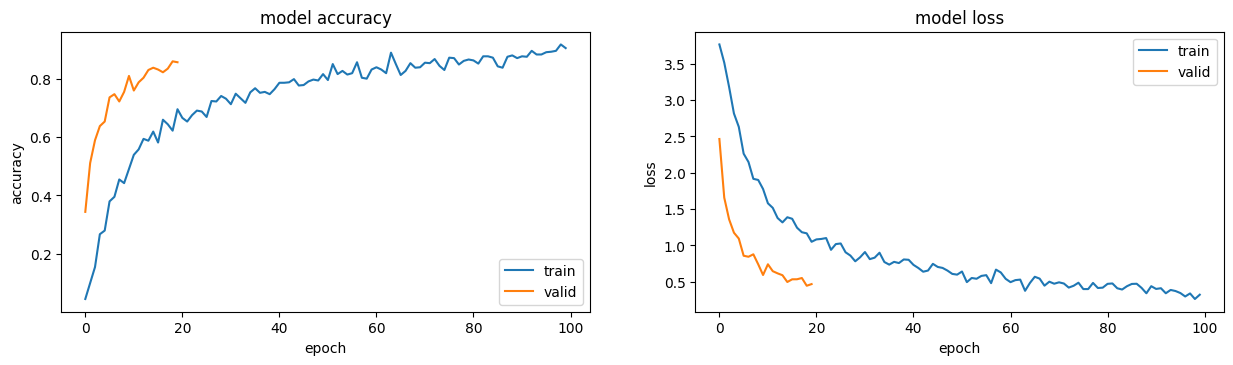

In [493]:
#compiling
plt.figure(1, figsize = (15,8)) 
plt.subplot(221)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
plt.show()



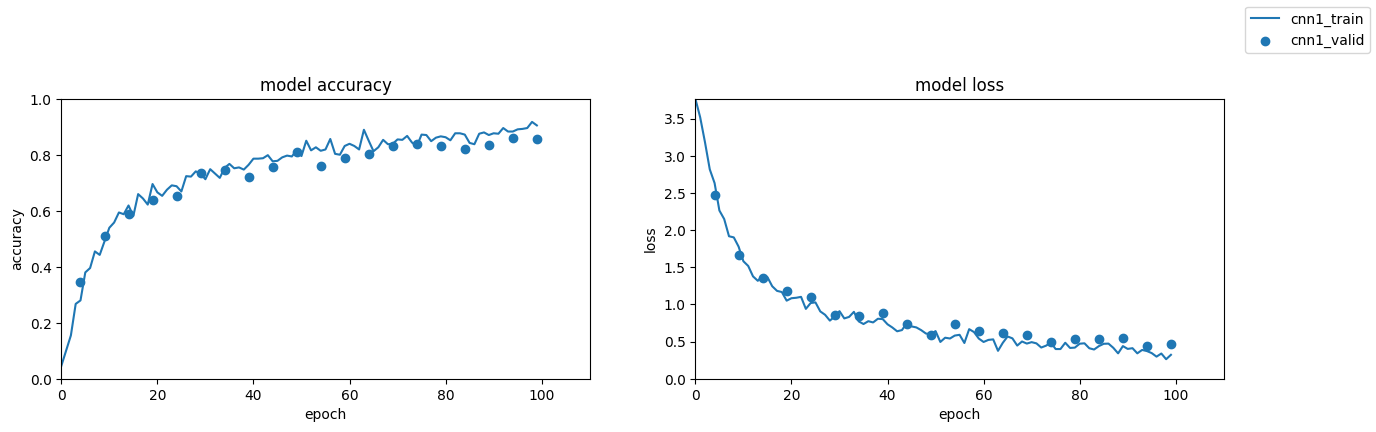

In [1064]:
fig = plt.figure(1, figsize = (15,8)) 

ax=fig.add_subplot(221, label="1")

ax.plot(history.history['accuracy'], color="C0", label='cnn1_train')
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
ax.set_ylim(0,1)
ax.set_xlim(0,110)

x_acc_val = range(4,(len(history.history['val_accuracy']))*5,5)
ax.scatter(x_acc_val, history.history['val_accuracy'], color="C0")


ax=fig.add_subplot(222, label="1")
ax.plot(history.history['loss'], color="C0", label='cnn1_train')
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
ax.set_ylim(0,max(history.history['loss']))
ax.set_xlim(0,110)

x_acc_val = range(4,(len(history.history['val_loss'])+1)*5-1,5)
ax.scatter(x_acc_val, history.history['val_loss'], color="C0")


fig.legend(['cnn1_train','cnn1_valid']) 
plt.show()

## Predict values for test data

In [508]:
# Create a new model instance
#model = create_model()

# Restore the weights
#model.load_weights('./checkpoints/my_checkpoint')

test_img, test_lables = next(test_set)
#len(test_img)
# Evaluate the model
test_loss, test_acc, test_mae = model.evaluate(test_set)#,verbose=2)

print("Model accuracy on test data is: {:5.2f}%".format(100 * test_acc))
print("Model MAE on test data is: ", test_mae)


138/138 [==============================] - 39s 278ms/step - loss: 0.4452 - accuracy: 0.8597 - mae: 0.0100
Model accuracy on test data is: 85.97%
Model MAE on test data is:  0.009998577646911144


In [507]:
#classifications = model.predict(test_img)

#print(len(classifications))

In [43]:
predictions = model.predict(x=test_set, steps=len(test_set), verbose=1)


138/138 [==============================] - 44s 319ms/step


In [44]:
len(np.round(predictions))

8795

In [527]:
test_set.class_indices#.keys())

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [512]:
## CONFUSION MATRIX
# https://deeplizard.com/learn/video/km7pxKy4UHU

from sklearn.metrics import multilabel_confusion_matrix
import itertools

In [528]:
cm = multilabel_confusion_matrix(y_true=test_set.classes, y_pred=np.argmax(predictions, axis=-1))#, labels= list(test_set.class_indices.keys()))
#https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_digits_active_learning.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-digits-active-learning-py

In [531]:
cm.shape

(38, 2, 2)

In [548]:
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title(class_label)

In [551]:
fig, ax = plt.subplots(13, 3, figsize=(12, 30))
    
for axes, cfs_matrix, label in zip(ax.flatten(), cm, test_set.class_indices.keys()):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

In [605]:
#y_pred =np.argmax(predictions, axis=-1)
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
#from sklearn.svm import SVC
#from sklearn.utils.fixes import loguniform

print(classification_report(test_set.classes, np.argmax(predictions, axis=-1), target_names= test_set.class_indices.keys()))
#ConfusionMatrixDisplay.from_estimator(
#    model, test_set, test_set.classes, display_labels=test_set.class_indices.keys(), xticks_rotation="vertical"
#)

fig, ax = plt.subplots(figsize=(25, 25))

ConfusionMatrixDisplay.from_predictions(test_set.classes,np.argmax(predictions, axis=-1),display_labels=test_set.class_indices.keys(), ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#plt.tight_layout()
#plt.show()
fig.savefig('confusion_matrix_CNN_38classes.png')


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.49      0.65       252
                                 Apple___Black_rot       0.90      0.80      0.85       249
                          Apple___Cedar_apple_rust       0.78      0.88      0.83       220
                                   Apple___healthy       0.86      0.78      0.82       251
                               Blueberry___healthy       0.97      0.77      0.86       227
          Cherry_(including_sour)___Powdery_mildew       0.78      0.96      0.86       211
                 Cherry_(including_sour)___healthy       0.97      0.91      0.94       228
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.78      0.79      0.78       205
                       Corn_(maize)___Common_rust_       0.99      0.98      0.99       239
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.79      0.

In [107]:
#plt.plot(stats_1.history['val_loss'], label = 'Model 1') 
#history = conv_model.fit(combined_dataset_train, epochs=150, validation_data = combined_dataset_test)   # 100 and 150 epochs (passes through the training set) 

In [561]:
## human accuracy is about 95%

#confusuin matrix

## balance the classes
# f1 score as metrics?

### Find missmatched images

In [46]:
fnames = test_set.filenames ## fnames is all the filenames/samples used in testing
errors = np.where(np.argmax(predictions, axis=-1) != test_set.classes)[0] ## misclassifications done on the test data where y_pred is the predicted values
missmatched = {}
for i in errors:
    #print(fnames[i], 'was missmatched as class:',list(test_set.class_indices.keys())[np.argmax(predictions, axis=-1)[i]] )
    missmatched[i] = {'filename': fnames[i], 'correct_class': list(test_set.class_indices.keys())[test_set.classes[i]]  ,'missmatched_class':list(test_set.class_indices.keys())[np.argmax(predictions, axis=-1)[i]]  }

print('there is ',len(errors), ' missmatched images out of ', len(test_set.classes),' test data')
print('that makes {:5.2f}%'.format(100*len(errors)/len(test_set.classes)))

there is  1234  missmatched images out of  8795  test data
that makes 14.03%


In [47]:
missmatched_df = pd.DataFrame.from_dict(missmatched,orient='index')
missmatched_df.iloc[:10]

filename       correct_class  \
1   Apple___Apple_scab/7f4d7ebc-7d2b-454f-8f61-b5d...  Apple___Apple_scab   
2   Apple___Apple_scab/808207df-2000-4050-a720-bd2...  Apple___Apple_scab   
3   Apple___Apple_scab/808207df-2000-4050-a720-bd2...  Apple___Apple_scab   
5   Apple___Apple_scab/815d2612-ee00-407a-8a0d-d0d...  Apple___Apple_scab   
6   Apple___Apple_scab/815d2612-ee00-407a-8a0d-d0d...  Apple___Apple_scab   
7   Apple___Apple_scab/81c34d6d-e734-4ee7-9645-0f8...  Apple___Apple_scab   
11  Apple___Apple_scab/83dc6270-1c10-4c76-a1a2-6b5...  Apple___Apple_scab   
12  Apple___Apple_scab/83dc6270-1c10-4c76-a1a2-6b5...  Apple___Apple_scab   
13  Apple___Apple_scab/84ba6fe9-427e-415b-8bfe-a1f...  Apple___Apple_scab   
14  Apple___Apple_scab/84ba6fe9-427e-415b-8bfe-a1f...  Apple___Apple_scab   

           missmatched_class  
1          Apple___Black_rot  
2       Potato___Late_blight  
3       Potato___Late_blight  
5       Potato___Late_blight  
6   Apple___Cedar_apple_rust  
7       Potato___Late_blight  
11        Tomato___Leaf_Mold  
12        Tomato___Leaf_Mold  
13         Apple___Black_rot  
14          Potato___healthy

In [48]:
def display_missmatched_img(data_frame, img_nr):
    image = plt.imread(valid_dir + data_frame['filename'][img_nr])
    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [49]:
display_missmatched_img(missmatched_df, 11)

In [175]:
#tomato_paths_valid_df = all_paths_valid_df[all_paths_valid_df['plant']=='Tomato']
def display_missmatched_img(image_df, correct_class, missmatched_class):
    filtered_image_df = image_df[image_df['correct_class']==correct_class]
    filtered_image_df = filtered_image_df[filtered_image_df['missmatched_class']==missmatched_class]
    print('there is ', len(filtered_image_df), ' of ', correct_class, ' images, missmatched as ', missmatched_class  )
    nr_of_images = len(filtered_image_df)
    if not filtered_image_df.empty: 
        #if nr_of_images == 1 :
        sample_image = filtered_image_df.sample()
            #print(os.path.join(valid_dir ,sample_image['filename'].iloc[0]))
        image = plt.imread(valid_dir + sample_image['filename'].iloc[0])
        #else:
          #  if nr_of_images > 9: 
          #      nr_of_images=9
           # sample_image = filtered_image_df.sample(nr_of_images)
           # HTML(df.to_html(formatters={'imagePILL': image_formatter}, escape=False))    
            #fig, axes = plt.subplots(round(nr_of_images/3),3, figsize=(10,10))
            #axes = axes.flatten()
            #for img, ax in zip(list(range(0,nr_of_images,1)), axes):
            #    ax.imread(valid_dir + sample_image['filename'].iloc[img])
            #ax.axis('off')
        #plt.tight_layout()
        #plt.show()
        #plt.imshow(image)
        #plt.axis("off")
        #plt.show()
        
        #sample_image = filtered_image_df.sample(3)
        #print(os.path.join(valid_dir ,sample_image['filename'].iloc[0]))
        #image = plt.imread(valid_dir + sample_image['filename'].iloc[0])
        plt.imshow(image)
        plt.axis("off")
        plt.show()
    return valid_dir + sample_image['filename'].iloc[0]
        

there is  39  of  Apple___Apple_scab  images, missmatched as  Potato___Late_blight


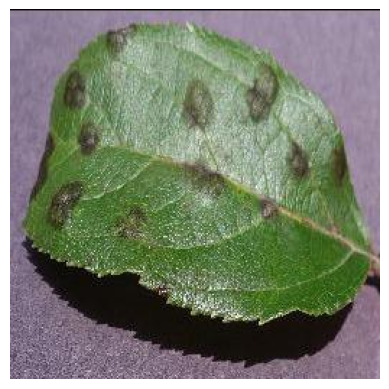

In [177]:
img_path = display_missmatched_img(missmatched_df, 'Apple___Apple_scab' , 'Potato___Late_blight')

In [180]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
#img_path='\\dogs-vs-cats\\test1\\137.jpg' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)#Load the input image
img = load_img(img_path, target_size=(150, 150))# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)# Rescale by 1/255
x /= 255.0# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

ValueError: in user code:

    File "/home/anna/miniconda3/envs/anns/lib/python3.9/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/home/anna/miniconda3/envs/anns/lib/python3.9/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/anna/miniconda3/envs/anns/lib/python3.9/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/home/anna/miniconda3/envs/anns/lib/python3.9/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/home/anna/miniconda3/envs/anns/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/anna/miniconda3/envs/anns/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(None, 150, 150, 3)


conv2d_6 (3, 3, 3, 16)
16


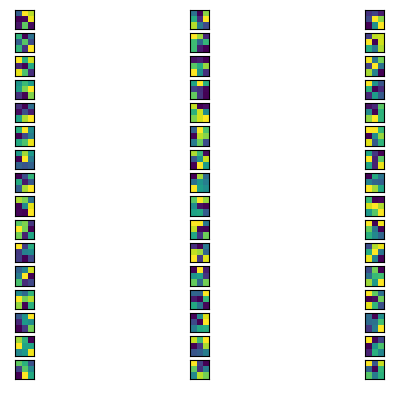

conv2d_7 (3, 3, 16, 32)
32


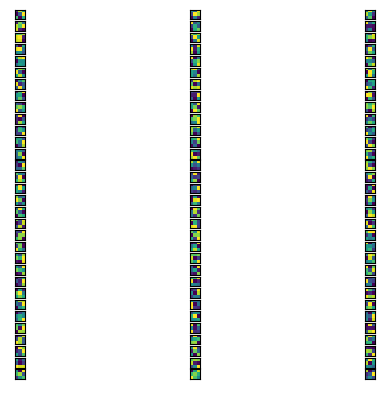

conv2d_8 (3, 3, 32, 64)
64


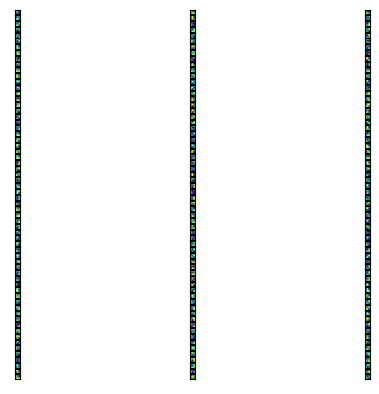

In [182]:
#Iterate thru all the layers of the model
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, weights.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(weights.shape[3])
        filter_cnt=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting ecah channel
            for j in range(filters.shape[0]):
                #plt.figure( figsize=(5, 5) )
                #f = plt.figure(figsize=(10,10))
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

In [184]:

successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.

In [198]:
img = load_img(img_path, target_size=(256, 256))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
#successive_feature_maps = visualization_model.predict(x)
x.shape

(1, 256, 256, 3)

In [199]:
successive_feature_maps = visualization_model.predict(x)

1/1 [==============================] - 0s 140ms/step


(1, 127, 127, 16)
(1, 125, 125, 32)
(1, 62, 62, 32)
(1, 60, 60, 64)
(1, 30, 30, 64)
(1, 57600)
(1, 512)
(1, 256)
(1, 38)


/tmp/ipykernel_230171/703540282.py:25: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


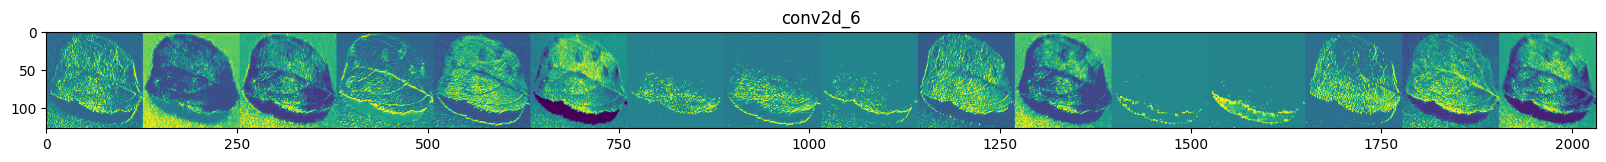

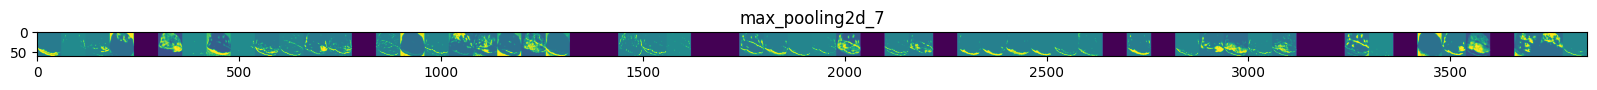

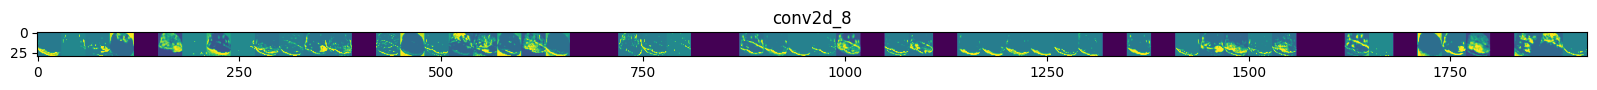

In [200]:
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 


In [763]:
# extract mismatched data
# spliting labels
# transfer training?
# dropouts

## SECOND CNN MODEL (extra dense layer)

In [669]:
# PARAMETERS
train_generator = train_set
val_data = validation_set
output_layer = no_of_classes
no_epochs = 109
validation_steps = 10
validation_freq = 5
steps_per_epoch= 10

In [670]:
# DEFINE MODEL
#def train_simple_model(train_generator,val_data, no_of_classes, no_epochs):

    # Instantiate the callback
callbacks = Callback_on_acc()
    # do we need a callback?

    # Define the model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(127, 127, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(62, 62, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
])
    

    # Compile the model
model_2.compile(loss='categorical_crossentropy',#'binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),#tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy', 'mae'])
    
model_2.summary()    

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_134 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_134 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_135 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_135 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_136 (Conv2D)         (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_136 (MaxPooli  (None, 30, 30, 64)     

In [671]:
history2 = model_2.fit(train_generator,
                        validation_data= val_data,
                        validation_steps = validation_steps,
                        validation_freq = validation_freq,
                        steps_per_epoch= steps_per_epoch,  
                        epochs=no_epochs,
                        callbacks=callbacks
                       ) 

Epoch 1/109
10/10 [==============================] - 17s 2s/step - loss: 4.1142 - accuracy: 0.0203 - mae: 0.0512
Epoch 2/109
10/10 [==============================] - 15s 1s/step - loss: 3.5791 - accuracy: 0.0547 - mae: 0.0511
Epoch 3/109
10/10 [==============================] - 14s 1s/step - loss: 3.4121 - accuracy: 0.1016 - mae: 0.0504
Epoch 4/109
10/10 [==============================] - 14s 1s/step - loss: 3.0570 - accuracy: 0.1641 - mae: 0.0485
Epoch 5/109
10/10 [==============================] - 19s 2s/step - loss: 2.7754 - accuracy: 0.2344 - mae: 0.0463 - val_loss: 2.5126 - val_accuracy: 0.2969 - val_mae: 0.0450
Epoch 6/109
10/10 [==============================] - 14s 1s/step - loss: 2.5168 - accuracy: 0.2766 - mae: 0.0439
Epoch 7/109
10/10 [==============================] - 14s 1s/step - loss: 2.4213 - accuracy: 0.3141 - mae: 0.0435
Epoch 8/109
10/10 [==============================] - 15s 1s/step - loss: 2.2166 - accuracy: 0.3516 - mae: 0.0410
Epoch 9/109
10/10 [=================

10/10 [==============================] - 14s 1s/step - loss: 0.5430 - accuracy: 0.8328 - mae: 0.0125
Epoch 67/109
10/10 [==============================] - 14s 1s/step - loss: 0.4816 - accuracy: 0.8484 - mae: 0.0121
Epoch 68/109
10/10 [==============================] - 14s 1s/step - loss: 0.4577 - accuracy: 0.8594 - mae: 0.0110
Epoch 69/109
10/10 [==============================] - 15s 1s/step - loss: 0.5169 - accuracy: 0.8266 - mae: 0.0126
Epoch 70/109
10/10 [==============================] - 17s 2s/step - loss: 0.6423 - accuracy: 0.8172 - mae: 0.0133 - val_loss: 0.5258 - val_accuracy: 0.8391 - val_mae: 0.0126
Epoch 71/109
10/10 [==============================] - 14s 1s/step - loss: 0.5038 - accuracy: 0.8250 - mae: 0.0136
Epoch 72/109
10/10 [==============================] - 14s 1s/step - loss: 0.4629 - accuracy: 0.8578 - mae: 0.0111
Epoch 73/109
10/10 [==============================] - 15s 1s/step - loss: 0.4796 - accuracy: 0.8406 - mae: 0.0123
Epoch 74/109
10/10 [=====================

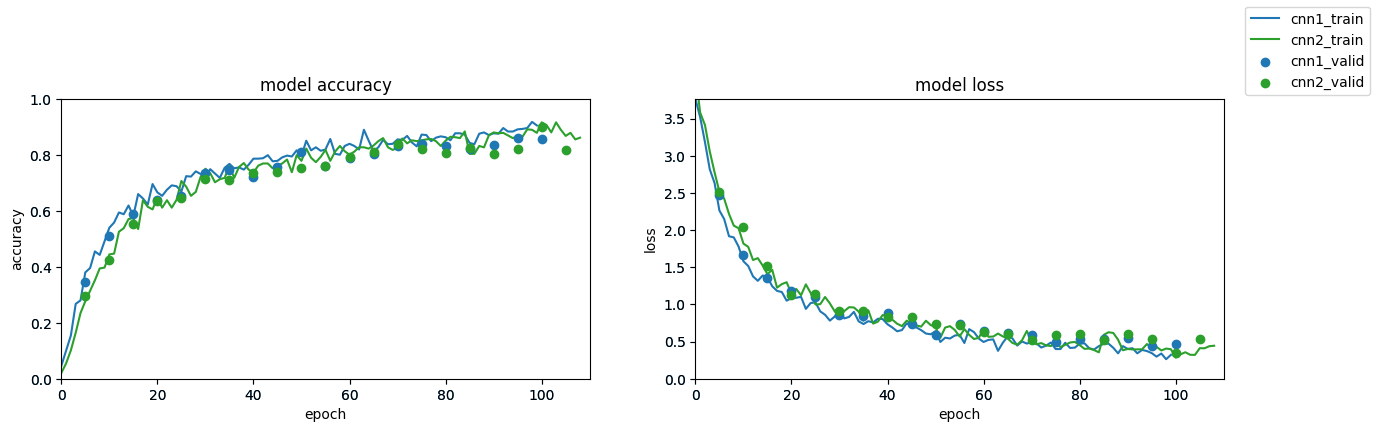

In [724]:
fig = plt.figure(1, figsize = (15,8)) 
#plt.subplot(221)  
ax=fig.add_subplot(221, label="1")
ax2=fig.add_subplot(221, label="2", frame_on=False)
#ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot(history.history['accuracy'], color="C0", label='cnn1_train')
ax.plot(history2.history['accuracy'], color="C2")
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
ax.set_ylim(0,1)
ax.set_xlim(0,110)

x_acc_val = range(5,(len(history.history['val_accuracy'])+1)*5,5)
x2_acc_val = range(5,(len(history2.history['val_accuracy'])+1)*5,5)
ax2.scatter(x_acc_val, history.history['val_accuracy'], color="C0")
ax2.scatter(x2_acc_val, history2.history['val_accuracy'], color="C2")
ax2.set_ylim(0,1)
ax2.set_xlim(0,110)

ax=fig.add_subplot(222, label="1")
ax2=fig.add_subplot(222, label="2", frame_on=False)
ax.plot(history.history['loss'], color="C0", label='cnn1_train')
ax.plot(history2.history['loss'], color="C2")
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
ax.set_ylim(0,max(history.history['loss']))
ax.set_xlim(0,110)

x_acc_val = range(5,(len(history.history['val_loss'])+1)*5,5)
x2_acc_val = range(5,(len(history2.history['val_loss'])+1)*5,5)
ax2.scatter(x_acc_val, history.history['val_loss'], color="C0")
ax2.scatter(x2_acc_val, history2.history['val_loss'], color="C2")
ax2.set_ylim(0,max(history.history['loss']))
ax2.set_xlim(0,110)

fig.legend(['cnn1_train', 'cnn2_train','cnn1_valid','cnn2_valid']) 
plt.show()

In [707]:
predictions2 = model_2.predict(x=test_set, steps=len(test_set), verbose=0)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.86      0.66      0.75       252
                                 Apple___Black_rot       0.65      0.97      0.78       249
                          Apple___Cedar_apple_rust       0.98      0.91      0.94       220
                                   Apple___healthy       0.99      0.69      0.81       251
                               Blueberry___healthy       0.95      0.84      0.89       227
          Cherry_(including_sour)___Powdery_mildew       0.88      0.96      0.92       211
                 Cherry_(including_sour)___healthy       0.94      0.91      0.92       228
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.86      0.77      0.81       205
                       Corn_(maize)___Common_rust_       0.98      0.98      0.98       239
               Corn_(maize)___Northern_Leaf_Blight       0.85      0.89      0.

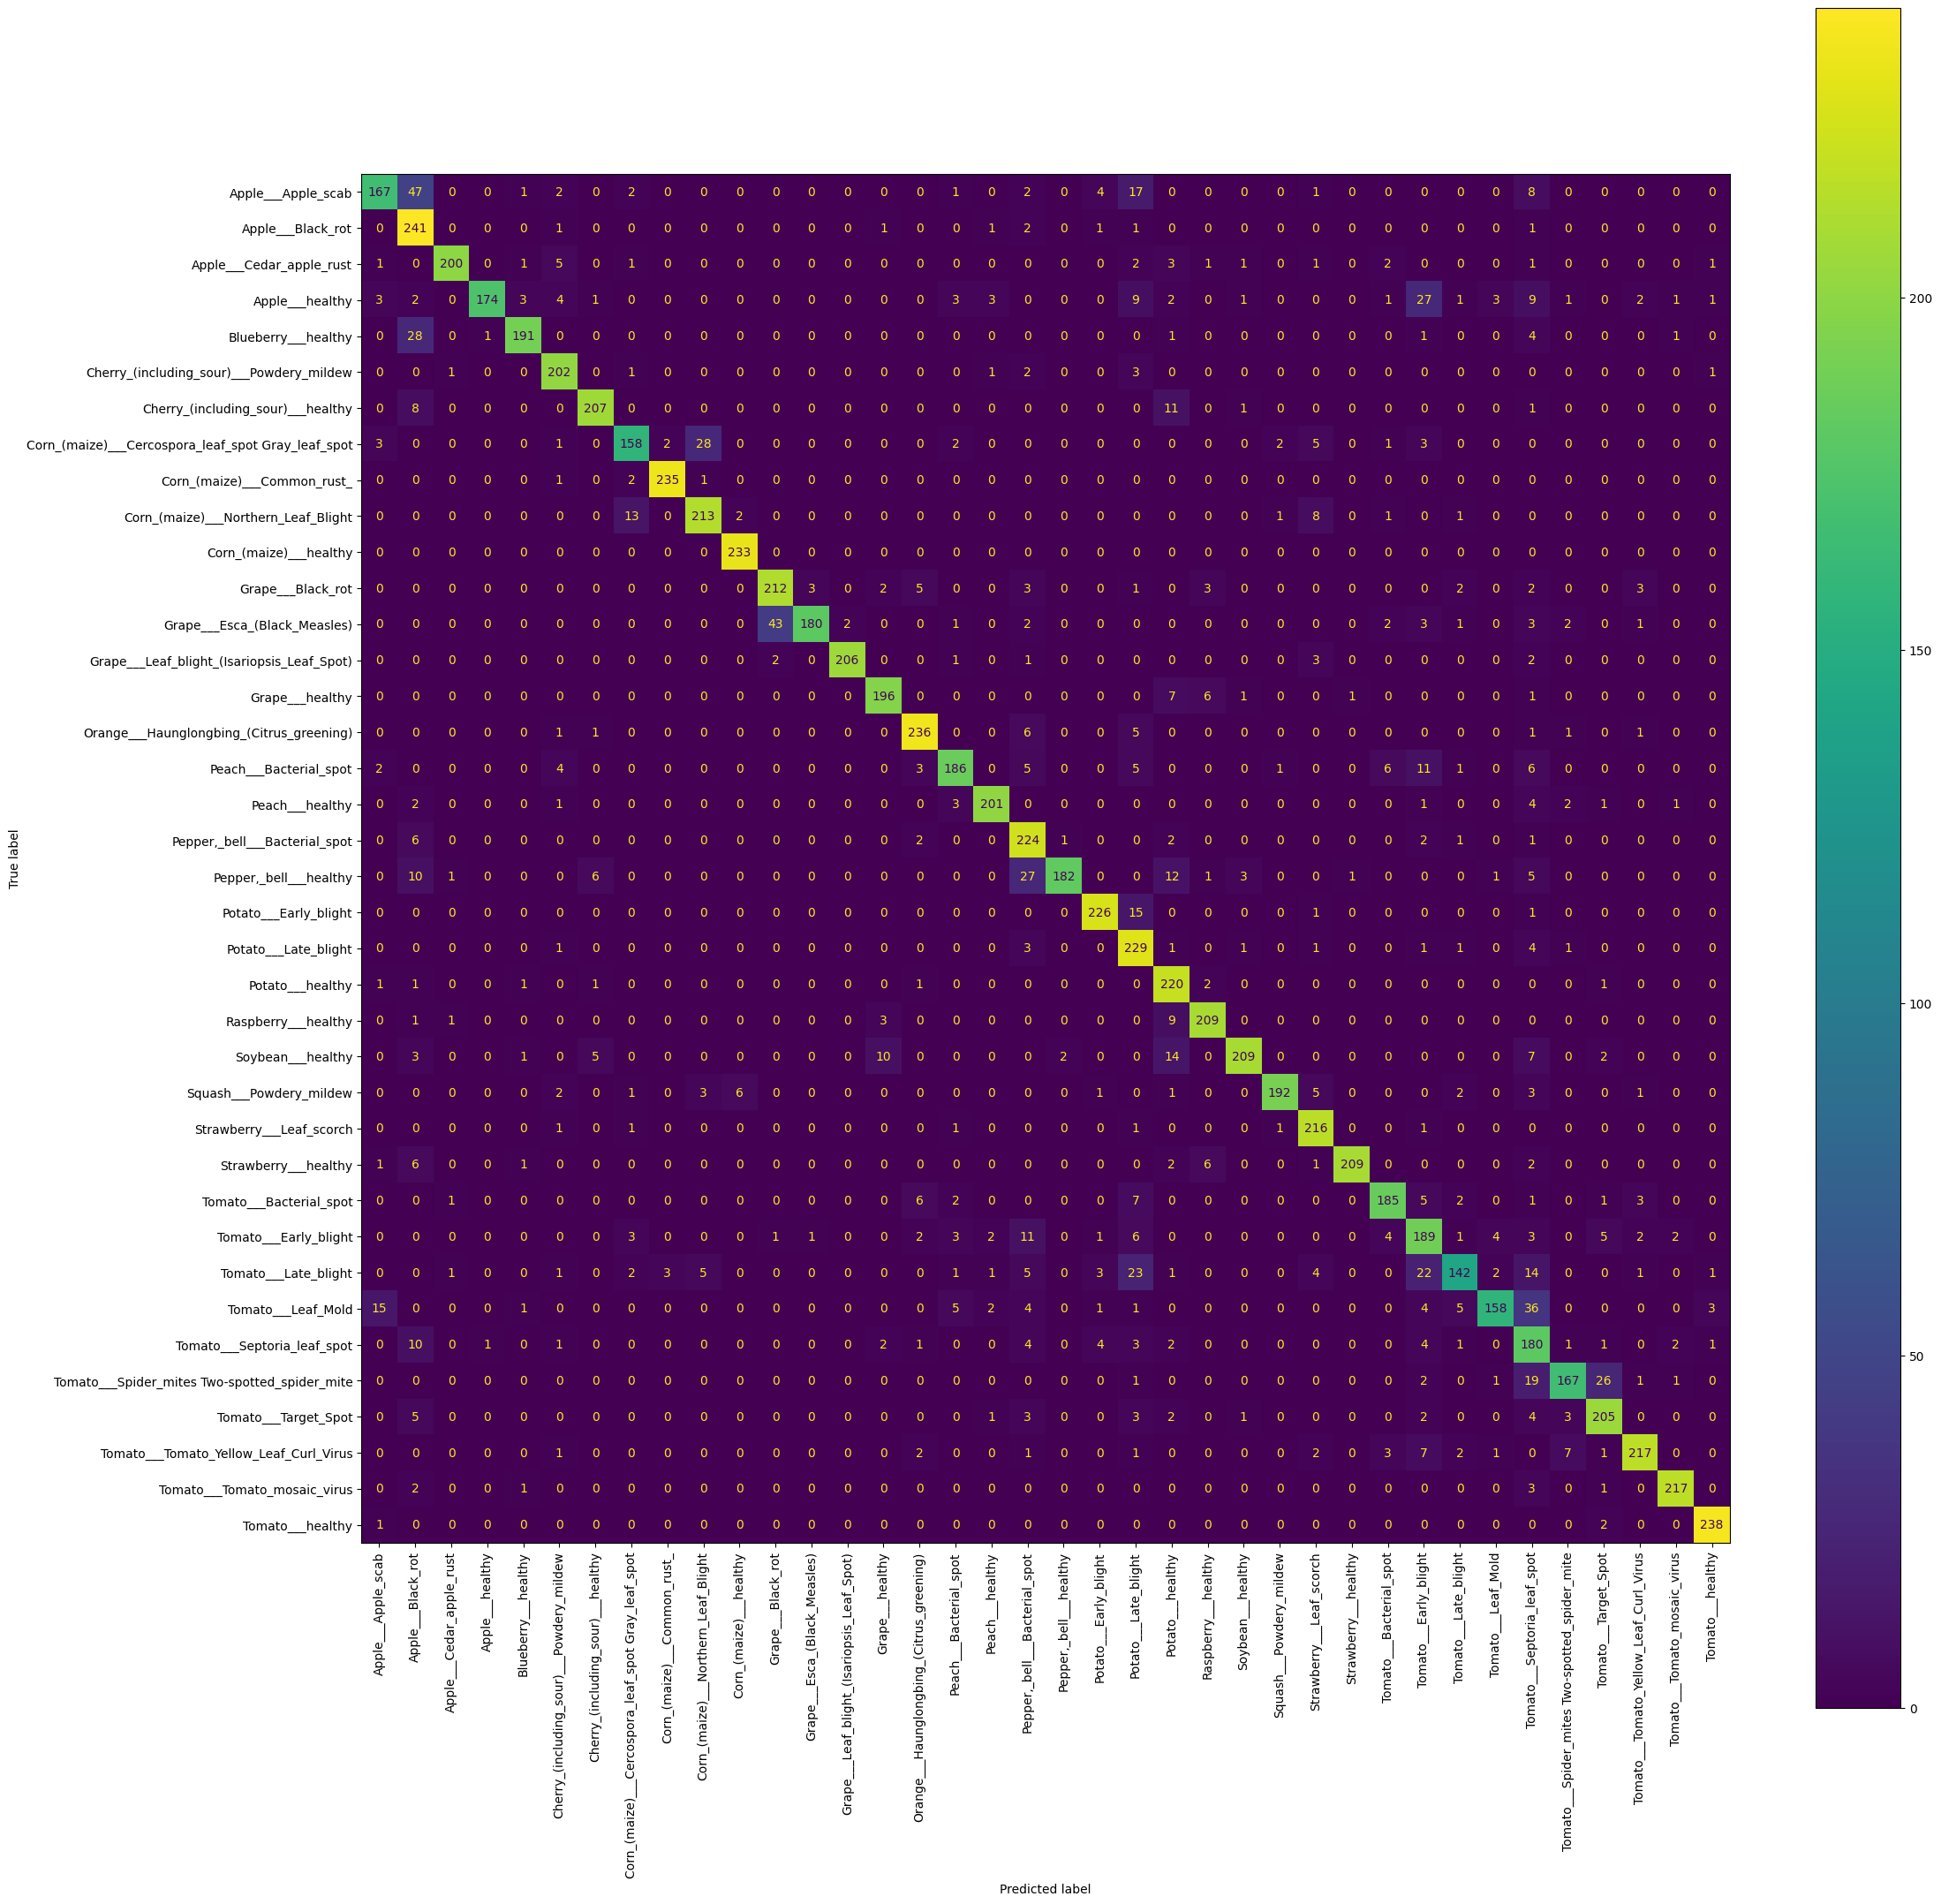

In [708]:

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(test_set.classes, np.argmax(predictions2, axis=-1), target_names= test_set.class_indices.keys()))

fig, ax = plt.subplots(figsize=(25, 25))

ConfusionMatrixDisplay.from_predictions(test_set.classes,np.argmax(predictions2, axis=-1),display_labels=test_set.class_indices.keys(), ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.savefig('confusion_matrix_CNN_2_38classes.png')

## Model with 4 Convolution layers

In [778]:
# PARAMETERS
train_generator = train_set
val_data = validation_set
output_layer = no_of_classes
no_epochs = 109
validation_steps = 10
validation_freq = 5
steps_per_epoch= 10

In [779]:
# DEFINE MODEL
#def train_simple_model(train_generator,val_data, no_of_classes, no_epochs):

    # Instantiate the callback
callbacks = Callback_on_acc()
    # do we need a callback?

    # Define the model
model_4CNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(127, 127, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(62, 62, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(62, 62, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    #tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
])
    

    # Compile the model
model_4CNN.compile(loss='categorical_crossentropy',#'binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),#tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy', 'mae'])
    
model_4CNN.summary()    

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_160 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_160 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_161 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_161 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_162 (Conv2D)         (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_162 (MaxPooli  (None, 30, 30, 64)     

In [762]:
history4CNN = model_4CNN.fit(train_generator,
                        validation_data= val_data,
                        validation_steps = validation_steps,
                        validation_freq = validation_freq,
                        steps_per_epoch= steps_per_epoch,  
                        epochs=no_epochs,
                        callbacks=callbacks
                       ) 

Epoch 1/109
10/10 [==============================] - 17s 2s/step - loss: 3.6717 - accuracy: 0.0375 - mae: 0.0512
Epoch 2/109
10/10 [==============================] - 14s 1s/step - loss: 3.6329 - accuracy: 0.0297 - mae: 0.0512
Epoch 3/109
10/10 [==============================] - 13s 1s/step - loss: 3.5682 - accuracy: 0.0469 - mae: 0.0511
Epoch 4/109
10/10 [==============================] - 13s 1s/step - loss: 3.4199 - accuracy: 0.0828 - mae: 0.0503
Epoch 5/109
10/10 [==============================] - 18s 2s/step - loss: 3.1621 - accuracy: 0.1437 - mae: 0.0486 - val_loss: 3.0325 - val_accuracy: 0.2047 - val_mae: 0.0481
Epoch 6/109
10/10 [==============================] - 14s 1s/step - loss: 3.0652 - accuracy: 0.1641 - mae: 0.0480
Epoch 7/109
10/10 [==============================] - 13s 1s/step - loss: 2.8333 - accuracy: 0.2313 - mae: 0.0466
Epoch 8/109
10/10 [==============================] - 14s 1s/step - loss: 2.6686 - accuracy: 0.2719 - mae: 0.0454
Epoch 9/109
10/10 [=================

10/10 [==============================] - 13s 1s/step - loss: 0.4806 - accuracy: 0.8453 - mae: 0.0124
Epoch 67/109
10/10 [==============================] - 13s 1s/step - loss: 0.5915 - accuracy: 0.8219 - mae: 0.0135
Epoch 68/109
10/10 [==============================] - 13s 1s/step - loss: 0.5983 - accuracy: 0.7828 - mae: 0.0151
Epoch 69/109
10/10 [==============================] - 13s 1s/step - loss: 0.6656 - accuracy: 0.7953 - mae: 0.0149
Epoch 70/109
10/10 [==============================] - 16s 2s/step - loss: 0.6095 - accuracy: 0.8094 - mae: 0.0147 - val_loss: 0.6099 - val_accuracy: 0.8141 - val_mae: 0.0150
Epoch 71/109
10/10 [==============================] - 13s 1s/step - loss: 0.5509 - accuracy: 0.8391 - mae: 0.0144
Epoch 72/109
10/10 [==============================] - 13s 1s/step - loss: 0.5455 - accuracy: 0.8188 - mae: 0.0134
Epoch 73/109
10/10 [==============================] - 13s 1s/step - loss: 0.5441 - accuracy: 0.8406 - mae: 0.0126
Epoch 74/109
10/10 [=====================

In [764]:
test_loss_4CNN, test_acc_4CNN, test_mae_4CNN = model_4CNN.evaluate(test_set)#,verbose=2)

print("Model accuracy on test data is: {:5.2f}%".format(100 * test_acc_4CNN))
print("Model MAE on test data is: ", test_mae_4CNN)

138/138 [==============================] - 40s 286ms/step - loss: 0.4797 - accuracy: 0.8496 - mae: 0.0113
Model accuracy on test data is: 84.96%
Model MAE on test data is:  0.011340041644871235


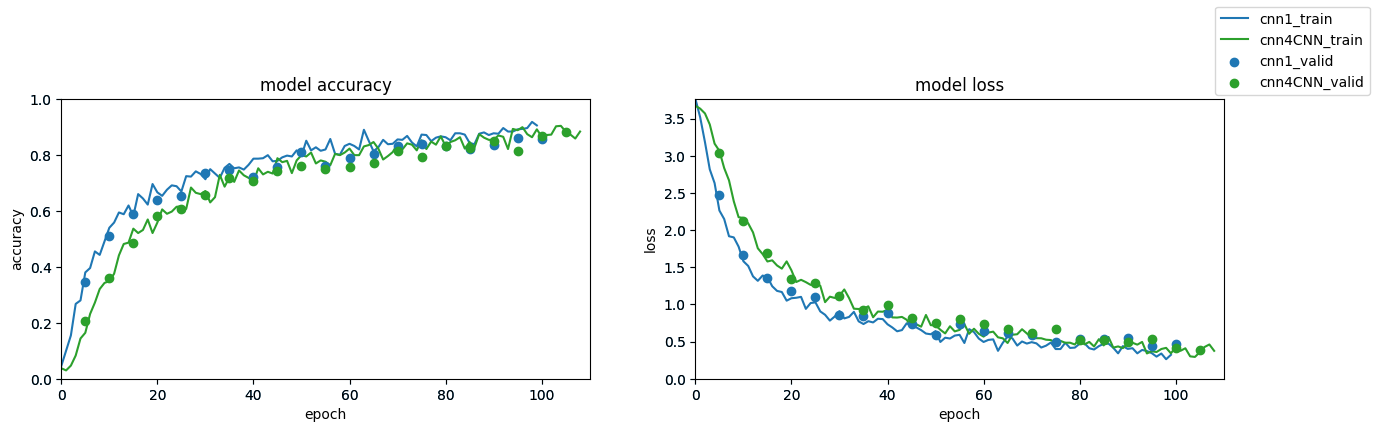

In [771]:
fig = plt.figure(1, figsize = (15,8)) 
#plt.subplot(221)  
ax=fig.add_subplot(221, label="1")
ax2=fig.add_subplot(221, label="2", frame_on=False)
#ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot(history.history['accuracy'], color="C0", label='cnn1_train')
ax.plot(history4CNN.history['accuracy'], color="C2")
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
ax.set_ylim(0,1)
ax.set_xlim(0,110)

x_acc_val = range(5,(len(history.history['val_accuracy'])+1)*5,5)
x2_acc_val = range(5,(len(history4CNN.history['val_accuracy'])+1)*5,5)
ax2.scatter(x_acc_val, history.history['val_accuracy'], color="C0")
ax2.scatter(x2_acc_val, history4CNN.history['val_accuracy'], color="C2")
ax2.set_ylim(0,1)
ax2.set_xlim(0,110)

ax=fig.add_subplot(222, label="1")
ax2=fig.add_subplot(222, label="2", frame_on=False)
ax.plot(history.history['loss'], color="C0", label='cnn1_train')
ax.plot(history4CNN.history['loss'], color="C2")
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
ax.set_ylim(0,max(history.history['loss']))
ax.set_xlim(0,110)

x_acc_val = range(5,(len(history.history['val_loss'])+1)*5,5)
x2_acc_val = range(5,(len(history4CNN.history['val_loss'])+1)*5,5)
ax2.scatter(x_acc_val, history.history['val_loss'], color="C0")
ax2.scatter(x2_acc_val, history4CNN.history['val_loss'], color="C2")
ax2.set_ylim(0,max(history.history['loss']))
ax2.set_xlim(0,110)

fig.legend(['cnn1_train', 'cnn4CNN_train','cnn1_valid','cnn4CNN_valid']) 
plt.show()

## Model with DROPOUT IN DENSE LAYERS

In [222]:
# PARAMETERS
train_generator = train_set
val_data = validation_set
output_layer = no_of_classes
no_epochs = 109
validation_steps = 10
validation_freq = 5
steps_per_epoch= 10

In [28]:
# DEFINE MODEL
#def train_simple_model(train_generator,val_data, no_of_classes, no_epochs):

    # Instantiate the callback
callbacks = Callback_on_acc()
    # do we need a callback?

    # Define the model
model_dropout_DL = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(127, 127, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(62, 62, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    #tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
])
    

    # Compile the model
model_dropout_DL.compile(loss='categorical_crossentropy',#'binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),#tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy', 'mae'])
    
model_dropout_DL.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)      

In [30]:
history_dropout_DL = model_dropout_DL.fit(train_generator,
                        validation_data= val_data,
                        validation_steps = validation_steps,
                        validation_freq = validation_freq,
                        steps_per_epoch= steps_per_epoch,  
                        epochs=no_epochs,
                        #callbacks=callbacks
                       ) 

Epoch 1/109
10/10 [==============================] - 16s 1s/step - loss: 4.0568 - accuracy: 0.0156 - mae: 0.0513
Epoch 2/109
10/10 [==============================] - 15s 1s/step - loss: 3.6339 - accuracy: 0.0250 - mae: 0.0512
Epoch 3/109
10/10 [==============================] - 15s 1s/step - loss: 3.5744 - accuracy: 0.0750 - mae: 0.0511
Epoch 4/109
10/10 [==============================] - 15s 1s/step - loss: 3.3931 - accuracy: 0.0797 - mae: 0.0500
Epoch 5/109
10/10 [==============================] - 18s 2s/step - loss: 3.2265 - accuracy: 0.1437 - mae: 0.0491 - val_loss: 3.0297 - val_accuracy: 0.1688 - val_mae: 0.0481
Epoch 6/109
10/10 [==============================] - 15s 1s/step - loss: 3.1253 - accuracy: 0.1375 - mae: 0.0486
Epoch 7/109
10/10 [==============================] - 15s 1s/step - loss: 2.8435 - accuracy: 0.2328 - mae: 0.0465
Epoch 8/109
10/10 [==============================] - 15s 1s/step - loss: 2.6690 - accuracy: 0.2656 - mae: 0.0455
Epoch 9/109
10/10 [=================

10/10 [==============================] - 15s 1s/step - loss: 0.8312 - accuracy: 0.7297 - mae: 0.0198
Epoch 67/109
10/10 [==============================] - 15s 1s/step - loss: 0.7262 - accuracy: 0.7797 - mae: 0.0174
Epoch 68/109
10/10 [==============================] - 16s 2s/step - loss: 0.6952 - accuracy: 0.7688 - mae: 0.0167
Epoch 69/109
10/10 [==============================] - 15s 1s/step - loss: 0.8263 - accuracy: 0.7406 - mae: 0.0190
Epoch 70/109
10/10 [==============================] - 19s 2s/step - loss: 0.7744 - accuracy: 0.7563 - mae: 0.0172 - val_loss: 0.7756 - val_accuracy: 0.7516 - val_mae: 0.0170
Epoch 71/109
10/10 [==============================] - 15s 1s/step - loss: 0.7114 - accuracy: 0.7641 - mae: 0.0179
Epoch 72/109
10/10 [==============================] - 16s 2s/step - loss: 0.7326 - accuracy: 0.7594 - mae: 0.0170
Epoch 73/109
10/10 [==============================] - 16s 2s/step - loss: 0.6417 - accuracy: 0.7953 - mae: 0.0157
Epoch 74/109
10/10 [=====================

In [33]:
model_dropout_DL.save('models/cnn_dropout_DL')
#reconstructed_model = keras.models.load_model("my_model")
#model.load_weights(checkpoint_path)

INFO:tensorflow:Assets written to: models/cnn_dropout_DL/assets


INFO:tensorflow:Assets written to: models/cnn_dropout_DL/assets


In [31]:
test_loss_dropout_DL, test_acc_dropout_DL, test_mae_dropout_DL = model_dropout_DL.evaluate(test_set)#,verbose=2)

print("Model accuracy on test data is: {:5.2f}%".format(100 * test_acc_dropout_DL))
print("Model MAE on test data is: ", test_mae_dropout_DL)

138/138 [==============================] - 44s 321ms/step - loss: 0.4725 - accuracy: 0.8474 - mae: 0.0117
Model accuracy on test data is: 84.74%
Model MAE on test data is:  0.011659958399832249


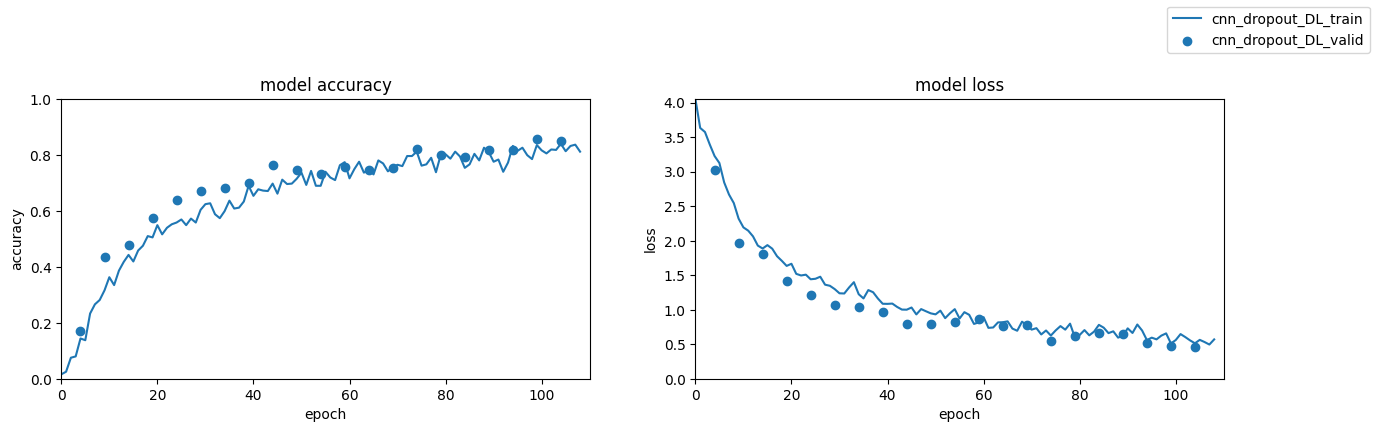

In [32]:
fig = plt.figure(1, figsize = (15,8)) 

ax=fig.add_subplot(221, label="1")

ax.plot(history_dropout_DL.history['accuracy'], color="C0", label='cnn1_train')
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
ax.set_ylim(0,1)
ax.set_xlim(0,110)

x_acc_val = range(4,(len(history_dropout_DL.history['val_accuracy']))*5,5)
ax.scatter(x_acc_val, history_dropout_DL.history['val_accuracy'], color="C0")


ax=fig.add_subplot(222, label="1")
ax.plot(history_dropout_DL.history['loss'], color="C0", label='cnn1_train')
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
ax.set_ylim(0,max(history_dropout_DL.history['loss']))
ax.set_xlim(0,110)

x_acc_val = range(4,(len(history_dropout_DL.history['val_loss'])+1)*5-1,5)
ax.scatter(x_acc_val, history_dropout_DL.history['val_loss'], color="C0")


fig.legend(['cnn_dropout_DL_train','cnn_dropout_DL_valid']) 
plt.show()

In [53]:
predictions_dropout_DL = model_dropout_DL.predict(x=test_set, steps=len(test_set), verbose=0)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.58      0.71       252
                                 Apple___Black_rot       0.92      0.77      0.84       249
                          Apple___Cedar_apple_rust       0.78      0.88      0.82       220
                                   Apple___healthy       0.92      0.66      0.77       251
                               Blueberry___healthy       0.93      0.91      0.92       227
          Cherry_(including_sour)___Powdery_mildew       0.84      0.94      0.89       211
                 Cherry_(including_sour)___healthy       0.81      0.96      0.88       228
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.80      0.67      0.73       205
                       Corn_(maize)___Common_rust_       0.98      0.97      0.97       239
               Corn_(maize)___Northern_Leaf_Blight       0.80      0.90      0.

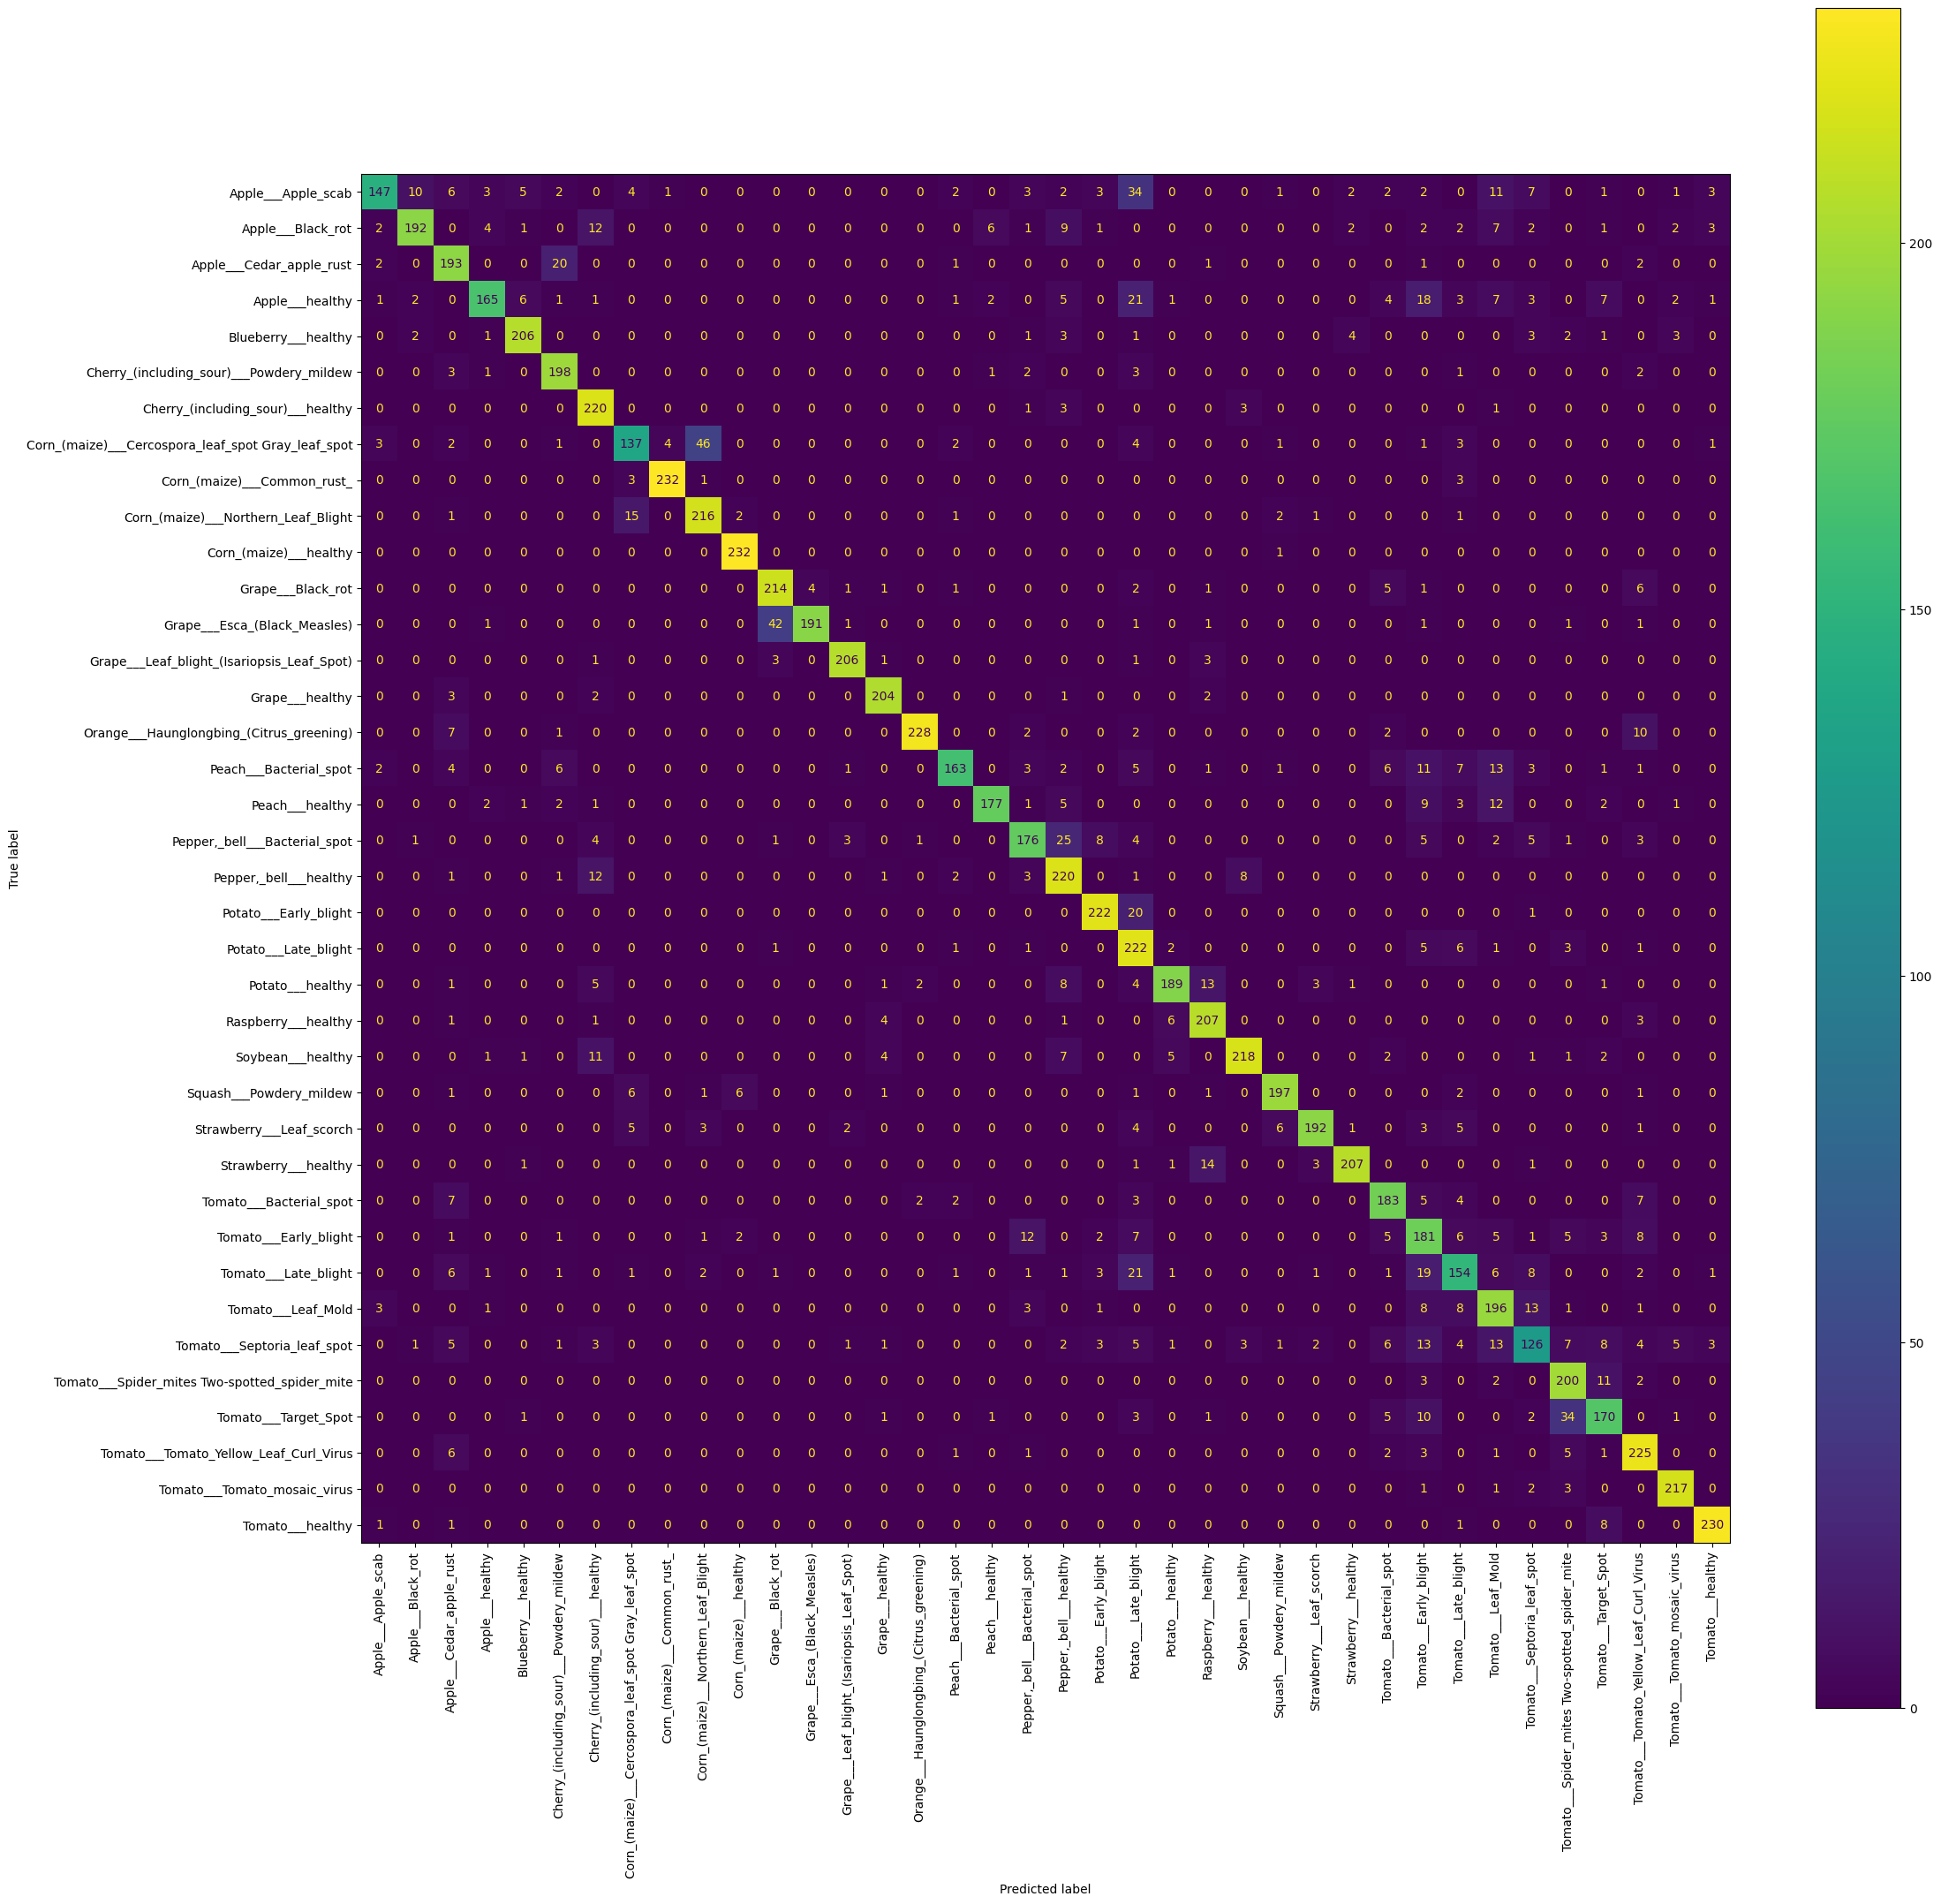

In [54]:

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(test_set.classes, np.argmax(predictions_dropout_DL, axis=-1), target_names= test_set.class_indices.keys()))

fig, ax = plt.subplots(figsize=(25, 25))

ConfusionMatrixDisplay.from_predictions(test_set.classes,np.argmax(predictions_dropout_DL, axis=-1),display_labels=test_set.class_indices.keys(), ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.savefig('confusion_matrix_CNN_dropout_DL_38classes.png')

## Model with DROPOUT IN CONVOLUTION LAYER

In [780]:
# DEFINE MODEL
#def train_simple_model(train_generator,val_data, no_of_classes, no_epochs):

    # Instantiate the callback
callbacks = Callback_on_acc()
    # do we need a callback?

    # Define the model
model_dropout = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(127, 127, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(62, 62, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    #tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
])
    

    # Compile the model
model_dropout.compile(loss='categorical_crossentropy',#'binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),#tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy', 'mae'])
    
model_dropout.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_164 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_164 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 127, 127, 16)      0         
                                                                 
 conv2d_165 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_165 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 62, 62, 32)      

In [781]:
history_dropout = model_dropout.fit(train_generator,
                        validation_data= val_data,
                        validation_steps = validation_steps,
                        validation_freq = validation_freq,
                        steps_per_epoch= steps_per_epoch,  
                        epochs=no_epochs,
                        callbacks=callbacks
                       ) 

Epoch 1/109
10/10 [==============================] - 19s 2s/step - loss: 5.4567 - accuracy: 0.0267 - mae: 0.0512
Epoch 2/109
10/10 [==============================] - 19s 2s/step - loss: 3.6345 - accuracy: 0.0266 - mae: 0.0512
Epoch 3/109
10/10 [==============================] - 20s 2s/step - loss: 3.6319 - accuracy: 0.0312 - mae: 0.0512
Epoch 4/109
10/10 [==============================] - 19s 2s/step - loss: 3.6144 - accuracy: 0.0469 - mae: 0.0512
Epoch 5/109
10/10 [==============================] - 27s 3s/step - loss: 3.5186 - accuracy: 0.0656 - mae: 0.0507 - val_loss: 3.4419 - val_accuracy: 0.1172 - val_mae: 0.0502
Epoch 6/109
10/10 [==============================] - 17s 2s/step - loss: 3.3311 - accuracy: 0.1094 - mae: 0.0490
Epoch 7/109
10/10 [==============================] - 19s 2s/step - loss: 3.1617 - accuracy: 0.1547 - mae: 0.0482
Epoch 8/109
10/10 [==============================] - 17s 2s/step - loss: 3.0801 - accuracy: 0.1625 - mae: 0.0482
Epoch 9/109
10/10 [=================

10/10 [==============================] - 19s 2s/step - loss: 0.6236 - accuracy: 0.7937 - mae: 0.0148
Epoch 67/109
10/10 [==============================] - 19s 2s/step - loss: 0.6067 - accuracy: 0.8109 - mae: 0.0138
Epoch 68/109
10/10 [==============================] - 20s 2s/step - loss: 0.5517 - accuracy: 0.8219 - mae: 0.0134
Epoch 69/109
10/10 [==============================] - 18s 2s/step - loss: 0.6895 - accuracy: 0.7844 - mae: 0.0158
Epoch 70/109
10/10 [==============================] - 26s 3s/step - loss: 0.5528 - accuracy: 0.8031 - mae: 0.0141 - val_loss: 0.6937 - val_accuracy: 0.7719 - val_mae: 0.0171
Epoch 71/109
10/10 [==============================] - 20s 2s/step - loss: 0.6097 - accuracy: 0.8047 - mae: 0.0145
Epoch 72/109
10/10 [==============================] - 19s 2s/step - loss: 0.5841 - accuracy: 0.8172 - mae: 0.0138
Epoch 73/109
10/10 [==============================] - 17s 2s/step - loss: 0.5487 - accuracy: 0.8219 - mae: 0.0133
Epoch 74/109
10/10 [=====================

In [782]:
test_loss_dropout, test_acc_dropout, test_mae_dropout = model_dropout.evaluate(test_set)#,verbose=2)

print("Model accuracy on test data is: {:5.2f}%".format(100 * test_acc_dropout))
print("Model MAE on test data is: ", test_mae_dropout)

138/138 [==============================] - 51s 368ms/step - loss: 0.4825 - accuracy: 0.8466 - mae: 0.0120
Model accuracy on test data is: 84.66%
Model MAE on test data is:  0.011989199556410313


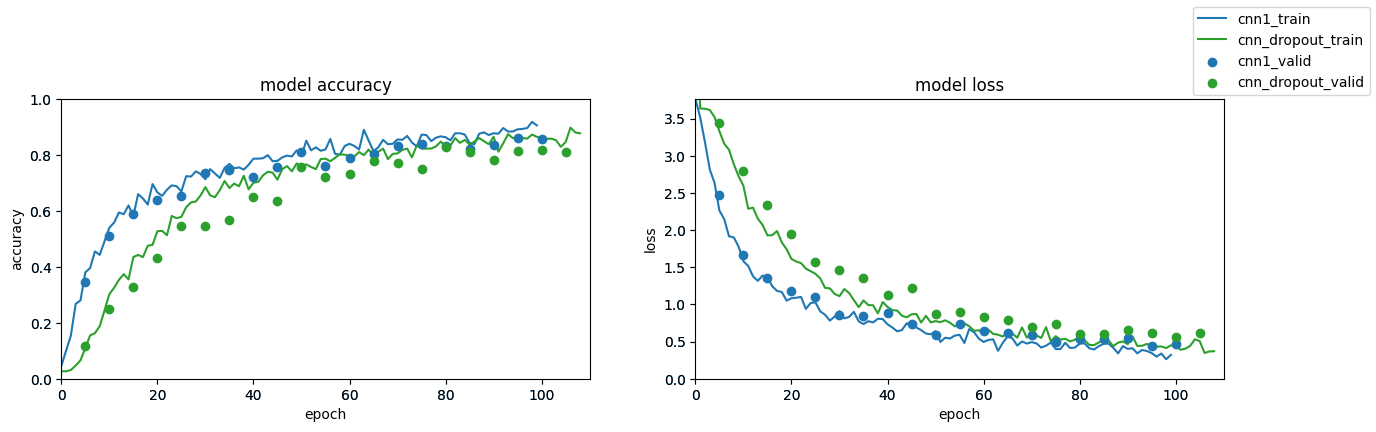

In [783]:
fig = plt.figure(1, figsize = (15,8)) 
#plt.subplot(221)  
ax=fig.add_subplot(221, label="1")
ax2=fig.add_subplot(221, label="2", frame_on=False)
#ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot(history.history['accuracy'], color="C0", label='cnn1_train')
ax.plot(history_dropout.history['accuracy'], color="C2")
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
ax.set_ylim(0,1)
ax.set_xlim(0,110)

x_acc_val = range(5,(len(history.history['val_accuracy'])+1)*5,5)
x2_acc_val = range(5,(len(history_dropout.history['val_accuracy'])+1)*5,5)
ax2.scatter(x_acc_val, history.history['val_accuracy'], color="C0")
ax2.scatter(x2_acc_val, history_dropout.history['val_accuracy'], color="C2")
ax2.set_ylim(0,1)
ax2.set_xlim(0,110)

ax=fig.add_subplot(222, label="1")
ax2=fig.add_subplot(222, label="2", frame_on=False)
ax.plot(history.history['loss'], color="C0", label='cnn1_train')
ax.plot(history_dropout.history['loss'], color="C2")
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
ax.set_ylim(0,max(history.history['loss']))
ax.set_xlim(0,110)

x_acc_val = range(5,(len(history.history['val_loss'])+1)*5,5)
x2_acc_val = range(5,(len(history_dropout.history['val_loss'])+1)*5,5)
ax2.scatter(x_acc_val, history.history['val_loss'], color="C0")
ax2.scatter(x2_acc_val, history_dropout.history['val_loss'], color="C2")
ax2.set_ylim(0,max(history.history['loss']))
ax2.set_xlim(0,110)

fig.legend(['cnn1_train', 'cnn_dropout_train','cnn1_valid','cnn_dropout_valid']) 
plt.show()

## dividing lables

In [67]:
allclasses = train_set.class_indices.keys()

plants = []
diseases = []
nrofdiseases = 0
for oneclass in allclasses:
    if oneclass.split('___')[0] not in plants:
        plants.append(oneclass.split('___')[0])
    if oneclass.split('___')[1] not in diseases:
        diseases.append(oneclass.split('___')[1])
    if oneclass.split('___')[1] != 'healthy':
        nrofdiseases += 1
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")
# unique diseases in the dataset
print(f"Unique Plants are: \n{diseases}")
# number of unique plants
print("Number of plants: {}".format(len(plants)))
# number of unique diseases
print("Number of diseases: {}".format(nrofdiseases))



Unique Plants are: 
['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']
Unique Plants are: 
['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'healthy', 'Powdery_mildew', 'Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_', 'Northern_Leaf_Blight', 'Esca_(Black_Measles)', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Haunglongbing_(Citrus_greening)', 'Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_scorch', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus']
Number of plants: 14
Number of diseases: 26


In [214]:
all_paths = {}
my_dict = {'label':[],'plant':[],'disease':[]}
for folder in os.listdir(train_dir):
    for name in os.listdir(train_dir+folder):
        all_paths[os.path.join(folder, name)] = {'label': folder, 'plant':folder.split('__')[0],'disease':folder.split('___')[1]}
    #[os.path.join(folder, name) for name in os.listdir(train_dir+folder)]
    #all_paths += file_dict
    
#len(all_paths)
all_paths_df=pd.DataFrame.from_dict(all_paths, orient='index')#, columns=['label'])
all_paths_df.index.name = 'filename'
all_paths_df = all_paths_df.reset_index(level=0)

In [215]:
all_paths_valid = {}
my_dict = {'label':[],'plant':[],'disease':[]}
for folder in os.listdir(valid_dir):
    for name in os.listdir(valid_dir+folder):
        all_paths_valid[os.path.join(folder, name)] = {'label': folder, 'plant':folder.split('__')[0],'disease':folder.split('___')[1]}

all_paths_valid_df=pd.DataFrame.from_dict(all_paths_valid, orient='index')#, columns=['label'])
all_paths_valid_df.index.name = 'filename'
all_paths_valid_df = all_paths_valid_df.reset_index(level=0)

In [218]:
#all_paths_df.loc[1,'filepath']
all_paths_valid_df.head()

filename  \
0  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...   
1  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...   
2  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...   
3  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...   
4  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...   

                                               label         plant  \
0  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...  Corn_(maize)   
1  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...  Corn_(maize)   
2  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...  Corn_(maize)   
3  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...  Corn_(maize)   
4  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...  Corn_(maize)   

                               disease  
0  Cercospora_leaf_spot Gray_leaf_spot  
1  Cercospora_leaf_spot Gray_leaf_spot  
2  Cercospora_leaf_spot Gray_leaf_spot  
3  Cercospora_leaf_spot Gray_leaf_spot  
4  Cercospora_leaf_spot Gray_leaf_spot

In [60]:
#all_paths_df=pd.DataFrame(columns=['filepath','label']) 


In [62]:
#for tomato in train_tomato_filepaths

#df_tomato = pd.DataFrame(train_tomato_folderpaths)

In [64]:
#len(df_tomato)

In [71]:
lable_column = 'plant'#'label'
#DATA:
train_set_plant = train_datagen.flow_from_dataframe(
          all_paths_df,
          train_dir,
          x_col='filename',
          y_col= lable_column,
          target_size=(256,256),
          keep_aspect_ratio=True,
          batch_size=64,
          seed=101, 
          shuffle=True,
          class_mode='categorical'
          )
test_set_plant = validation_datagen.flow_from_dataframe(
          all_paths_valid_df,
          valid_dir,
          x_col='filename',
          y_col=lable_column,
          target_size=(256,256),
          keep_aspect_ratio=True,
          batch_size=64,
          shuffle=False,
          # seed=101,
          class_mode='categorical',
          subset = "training")

validation_set_plant = validation_datagen.flow_from_dataframe(
          all_paths_valid_df,
          valid_dir,
          x_col='filename',
          y_col=lable_column,
          target_size=(256,256),
          keep_aspect_ratio=True,
          batch_size=64,
          shuffle=True,
          # seed=101,
          class_mode='categorical',
          subset = "validation") 


Found 70295 validated image filenames belonging to 14 classes.
Found 8786 validated image filenames belonging to 14 classes.
Found 8786 validated image filenames belonging to 14 classes.


In [202]:
fig, ax = plt.subplots()
all_paths_valid_df['plant'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:>

In [212]:
plt.hist(validation_set_plant.classes)

(array([ 951.,    0.,  887., 1878.,    0.,    0.,  903.,    0.,    0.,
        4167.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

## NN classification by plant

In [221]:
# DEFINE MODEL
#def train_simple_model(train_generator,val_data, no_of_classes, no_epochs):

    # Instantiate the callback
callbacks = Callback_on_acc()
    # do we need a callback?

    # Define the model
model_plants = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(127, 127, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(62, 62, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    #tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])
    

    # Compile the model
model_plants.compile(loss='categorical_crossentropy',#'binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),#tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy', 'mae'])
    
model_plants.summary()    


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 30, 30, 64)      

In [1000]:
history_plants = model_plants.fit(train_set_plant,
                        validation_data= validation_set_plant,
                        validation_steps = validation_steps,
                        validation_freq = validation_freq,
                        steps_per_epoch= steps_per_epoch,  
                        epochs=no_epochs,
                        callbacks=callbacks
                       ) 

Epoch 1/109
10/10 [==============================] - 15s 1s/step - loss: 2.6989 - accuracy: 0.1719 - mae: 0.1279
Epoch 2/109
10/10 [==============================] - 15s 2s/step - loss: 2.3730 - accuracy: 0.2703 - mae: 0.1254
Epoch 3/109
10/10 [==============================] - 15s 2s/step - loss: 2.2417 - accuracy: 0.3203 - mae: 0.1220
Epoch 4/109
10/10 [==============================] - 15s 1s/step - loss: 2.0489 - accuracy: 0.3750 - mae: 0.1152
Epoch 5/109
10/10 [==============================] - 19s 2s/step - loss: 1.7857 - accuracy: 0.4672 - mae: 0.1009 - val_loss: 1.5377 - val_accuracy: 0.5406 - val_mae: 0.0914
Epoch 6/109
10/10 [==============================] - 15s 1s/step - loss: 1.5718 - accuracy: 0.5000 - mae: 0.0935
Epoch 7/109
10/10 [==============================] - 15s 1s/step - loss: 1.6695 - accuracy: 0.4641 - mae: 0.0962
Epoch 8/109
10/10 [==============================] - 15s 1s/step - loss: 1.5156 - accuracy: 0.5188 - mae: 0.0924
Epoch 9/109
10/10 [=================

10/10 [==============================] - 14s 1s/step - loss: 0.3122 - accuracy: 0.9031 - mae: 0.0225
Epoch 67/109
10/10 [==============================] - 14s 1s/step - loss: 0.3136 - accuracy: 0.9031 - mae: 0.0232
Epoch 68/109
10/10 [==============================] - 14s 1s/step - loss: 0.3047 - accuracy: 0.8828 - mae: 0.0233
Epoch 69/109
10/10 [==============================] - 14s 1s/step - loss: 0.3388 - accuracy: 0.8859 - mae: 0.0235
Epoch 70/109
10/10 [==============================] - 17s 2s/step - loss: 0.2552 - accuracy: 0.9156 - mae: 0.0198 - val_loss: 0.3840 - val_accuracy: 0.8734 - val_mae: 0.0238
Epoch 71/109
10/10 [==============================] - 14s 1s/step - loss: 0.2731 - accuracy: 0.9062 - mae: 0.0210
Epoch 72/109
10/10 [==============================] - 14s 1s/step - loss: 0.2399 - accuracy: 0.9141 - mae: 0.0187
Epoch 73/109
10/10 [==============================] - 14s 1s/step - loss: 0.3161 - accuracy: 0.8922 - mae: 0.0226
Epoch 74/109
10/10 [=====================

In [1002]:
test_loss_plants, test_acc_plants, test_mae_plants = model_plants.evaluate(test_set_plant)#,verbose=2)

print("Model accuracy on test data is: {:5.2f}%".format(100 * test_acc_plants))
print("Model MAE on test data is: ", test_mae_plants)

138/138 [==============================] - 55s 393ms/step - loss: 0.3051 - accuracy: 0.8971 - mae: 0.0191
Model accuracy on test data is: 89.71%
Model MAE on test data is:  0.019139697775244713


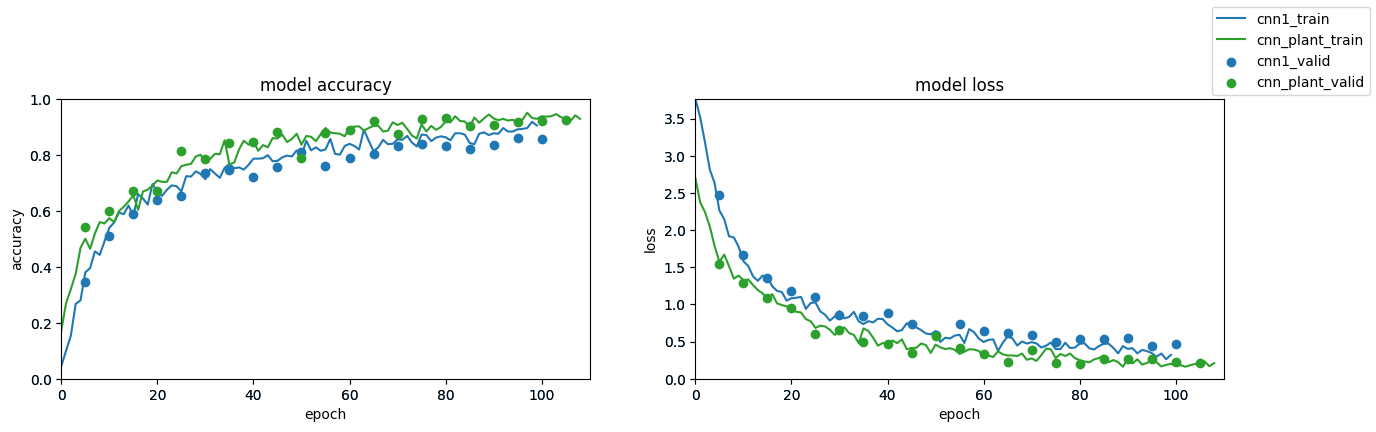

In [1004]:
fig = plt.figure(1, figsize = (15,8)) 
#plt.subplot(221)  
ax=fig.add_subplot(221, label="1")
ax2=fig.add_subplot(221, label="2", frame_on=False)
#ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot(history.history['accuracy'], color="C0", label='cnn1_train')
ax.plot(history_plants.history['accuracy'], color="C2")
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
ax.set_ylim(0,1)
ax.set_xlim(0,110)

x_acc_val = range(5,(len(history.history['val_accuracy'])+1)*5,5)
x2_acc_val = range(5,(len(history_plants.history['val_accuracy'])+1)*5,5)
ax2.scatter(x_acc_val, history.history['val_accuracy'], color="C0")
ax2.scatter(x2_acc_val, history_plants.history['val_accuracy'], color="C2")
ax2.set_ylim(0,1)
ax2.set_xlim(0,110)

ax=fig.add_subplot(222, label="1")
ax2=fig.add_subplot(222, label="2", frame_on=False)
ax.plot(history.history['loss'], color="C0", label='cnn1_train')
ax.plot(history_plants.history['loss'], color="C2")
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
ax.set_ylim(0,max(history.history['loss']))
ax.set_xlim(0,110)

x_acc_val = range(5,(len(history.history['val_loss'])+1)*5,5)
x2_acc_val = range(5,(len(history_plants.history['val_loss'])+1)*5,5)
ax2.scatter(x_acc_val, history.history['val_loss'], color="C0")
ax2.scatter(x2_acc_val, history_plants.history['val_loss'], color="C2")
ax2.set_ylim(0,max(history.history['loss']))
ax2.set_xlim(0,110)

fig.legend(['cnn1_train', 'cnn_plant_train','cnn1_valid','cnn_plant_valid']) 
plt.show()

In [ ]:
## plants correct

In [220]:
all_paths_valid_2_df = all_paths_valid_df.groupby('plant').sample(frac=0.5)
#fig, ax = plt.subplots()
#test['disease'].value_counts().plot(ax=ax, kind='bar')
all_paths_test_df = all_paths_valid_df[~all_paths_valid_df.apply(tuple,1).isin(all_paths_valid_2_df.apply(tuple,1))]


lable_column = 'plant'#'label'
#DATA:
train_set_plant = train_datagen.flow_from_dataframe(
          all_paths_df,
          train_dir,
          x_col='filename',
          y_col= lable_column,
          target_size=(256,256),
          keep_aspect_ratio=True,
          batch_size=64,
          seed=101, 
          shuffle=True,
          class_mode='categorical'
          )
test_set_plant = train_datagen.flow_from_dataframe(
          all_paths_valid_2_df,
          valid_dir,
          x_col='filename',
          y_col=lable_column,
          target_size=(256,256),
          keep_aspect_ratio=True,
          batch_size=64,
          shuffle=False,
          # seed=101,
          class_mode='categorical',
          )#subset = "training")

validation_set_plant = train_datagen.flow_from_dataframe(
          all_paths_test_df,
          valid_dir,
          x_col='filename',
          y_col=lable_column,
          target_size=(256,256),
          keep_aspect_ratio=True,
          batch_size=64,
          shuffle=True,
          # seed=101,
          class_mode='categorical',
          )#subset = "validation") 

Found 70295 validated image filenames belonging to 14 classes.
Found 8785 validated image filenames belonging to 14 classes.
Found 8787 validated image filenames belonging to 14 classes.


In [223]:
history_plants2 = model_plants.fit(train_set_plant,
                        validation_data= validation_set_plant,
                        validation_steps = validation_steps,
                        validation_freq = validation_freq,
                        steps_per_epoch= steps_per_epoch,  
                        epochs=no_epochs,
                        callbacks=callbacks
                       ) 

Epoch 1/109
10/10 [==============================] - 17s 2s/step - loss: 4.3352 - accuracy: 0.2172 - mae: 0.1234
Epoch 2/109
10/10 [==============================] - 15s 2s/step - loss: 2.3584 - accuracy: 0.2391 - mae: 0.1250
Epoch 3/109
10/10 [==============================] - 16s 2s/step - loss: 2.2005 - accuracy: 0.3594 - mae: 0.1213
Epoch 4/109
10/10 [==============================] - 16s 2s/step - loss: 1.9243 - accuracy: 0.3875 - mae: 0.1099
Epoch 5/109
10/10 [==============================] - 21s 2s/step - loss: 1.6180 - accuracy: 0.4906 - mae: 0.0968 - val_loss: 1.5792 - val_accuracy: 0.5078 - val_mae: 0.0910
Epoch 6/109
10/10 [==============================] - 16s 2s/step - loss: 1.6665 - accuracy: 0.4734 - mae: 0.0962
Epoch 7/109
10/10 [==============================] - 16s 2s/step - loss: 1.5106 - accuracy: 0.5203 - mae: 0.0930
Epoch 8/109
10/10 [==============================] - 15s 2s/step - loss: 1.4100 - accuracy: 0.5703 - mae: 0.0864
Epoch 9/109
10/10 [=================

10/10 [==============================] - 15s 2s/step - loss: 0.3627 - accuracy: 0.8781 - mae: 0.0264
Epoch 67/109
10/10 [==============================] - 16s 2s/step - loss: 0.3466 - accuracy: 0.8875 - mae: 0.0258
Epoch 68/109
10/10 [==============================] - 16s 2s/step - loss: 0.3101 - accuracy: 0.9016 - mae: 0.0231
Epoch 69/109
10/10 [==============================] - 17s 2s/step - loss: 0.3243 - accuracy: 0.8891 - mae: 0.0247
Epoch 70/109
10/10 [==============================] - 20s 2s/step - loss: 0.2745 - accuracy: 0.9182 - mae: 0.0222 - val_loss: 0.3711 - val_accuracy: 0.8703 - val_mae: 0.0260
Epoch 71/109
10/10 [==============================] - 16s 2s/step - loss: 0.4107 - accuracy: 0.8484 - mae: 0.0281
Epoch 72/109
10/10 [==============================] - 17s 2s/step - loss: 0.4754 - accuracy: 0.8391 - mae: 0.0314
Epoch 73/109
10/10 [==============================] - 19s 2s/step - loss: 0.2950 - accuracy: 0.9125 - mae: 0.0230
Epoch 74/109
10/10 [=====================

In [224]:
model_plants.save('models/cnn_plants')

INFO:tensorflow:Assets written to: models/cnn_plants/assets


INFO:tensorflow:Assets written to: models/cnn_plants/assets


In [225]:
test_loss_plants, test_acc_plants, test_mae_plants = model_plants.evaluate(test_set_plant)#,verbose=2)

print("Model accuracy on test data is: {:5.2f}%".format(100 * test_acc_plants))
print("Model MAE on test data is: ", test_mae_plants)

138/138 [==============================] - 52s 372ms/step - loss: 0.2947 - accuracy: 0.9051 - mae: 0.0194
Model accuracy on test data is: 90.51%
Model MAE on test data is:  0.019408924505114555


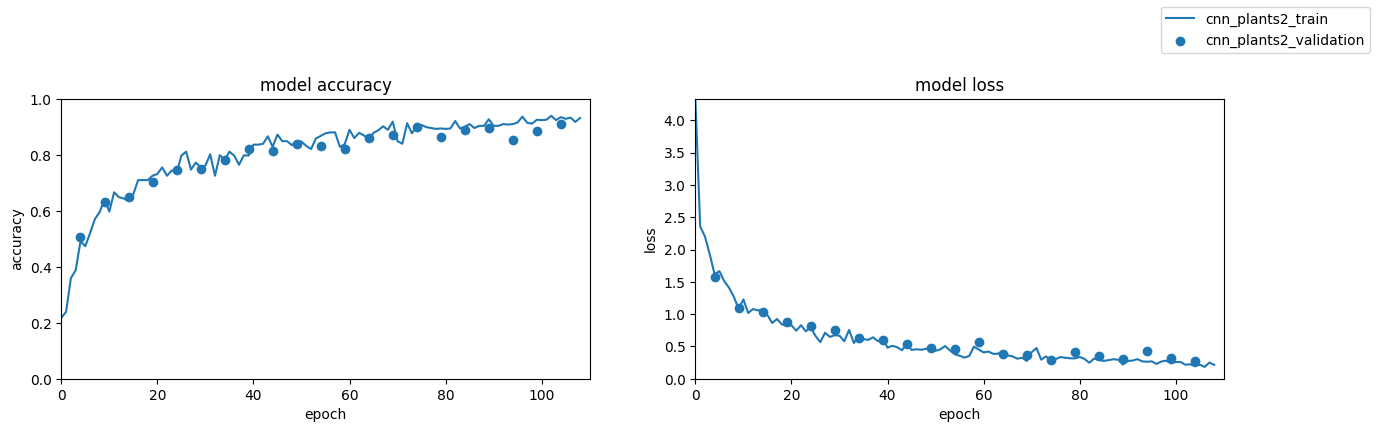

In [227]:
fig = plt.figure(1, figsize = (15,8)) 

ax=fig.add_subplot(221, label="1")

ax.plot(history_plants2.history['accuracy'], color="C0", label='cnn1_train')
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
ax.set_ylim(0,1)
ax.set_xlim(0,110)

x_acc_val = range(4,(len(history_plants2.history['val_accuracy']))*5,5)
ax.scatter(x_acc_val, history_plants2.history['val_accuracy'], color="C0")


ax=fig.add_subplot(222, label="1")
ax.plot(history_plants2.history['loss'], color="C0", label='cnn1_train')
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
ax.set_ylim(0,max(history_plants2.history['loss']))
ax.set_xlim(0,110)

x_acc_val = range(4,(len(history_plants2.history['val_loss'])+1)*5-1,5)
ax.scatter(x_acc_val, history_plants2.history['val_loss'], color="C0")


fig.legend(['cnn_plants2_train','cnn_plants2_validation']) 
plt.show()

In [229]:
#predictions_dropout_DL = model_dropout_DL.predict(x=test_set, steps=len(test_set), verbose=0)
predictions_plants2 = model_plants.predict(x=test_set_plant, steps=len(test_set_plant), verbose=1)

138/138 [==============================] - 53s 386ms/step


                         precision    recall  f1-score   support

                  Apple       0.94      0.69      0.80       972
              Blueberry       0.91      0.87      0.89       227
Cherry_(including_sour)       0.94      0.89      0.92       438
           Corn_(maize)       0.99      0.96      0.97       914
                  Grape       0.99      0.97      0.98       902
                 Orange       0.99      0.92      0.95       252
                  Peach       0.81      0.94      0.87       446
           Pepper,_bell       0.73      0.93      0.82       488
                 Potato       0.82      0.90      0.86       713
              Raspberry       1.00      0.72      0.84       222
                Soybean       0.94      0.88      0.91       252
                 Squash       0.89      0.98      0.93       217
             Strawberry       0.97      0.92      0.95       450
                 Tomato       0.89      0.95      0.92      2292

               accuracy

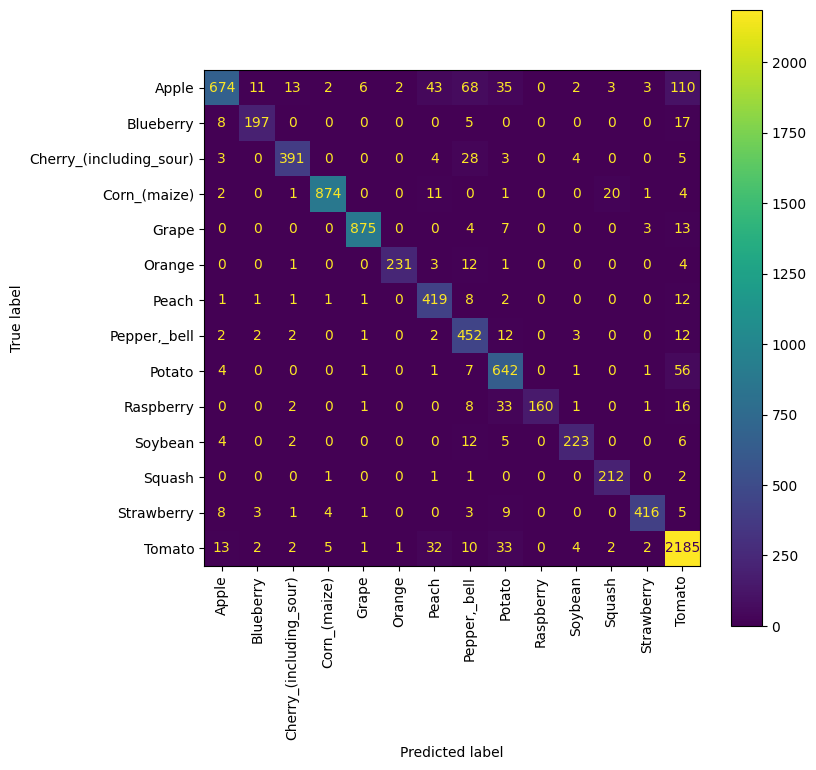

In [231]:

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(test_set_plant.classes, np.argmax(predictions_plants2, axis=-1), target_names= test_set_plant.class_indices.keys()))

fig, ax = plt.subplots(figsize=(8, 8))

ConfusionMatrixDisplay.from_predictions(test_set_plant.classes,np.argmax(predictions_plants2, axis=-1),display_labels=test_set_plant.class_indices.keys(), ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.savefig('confusion_matrix_CNN_plants_14classes.png')

# NN for tomato disease

In [74]:
# filter tomato diseses from all_paths_df
tomato_paths_df = all_paths_df[all_paths_df['plant']=='Tomato']

paths_difference = all_paths_df[~all_paths_df.apply(tuple,1).isin(tomato_paths_df.apply(tuple,1))]
misscassified_paths = paths_difference.sample(n = 2000)
misscassified_paths['disease'] = 'missclassified'


tomato_paths_df = tomato_paths_df.append(misscassified_paths) 
#len(paths_difference) 
#len(tomato_paths_df)
#misscassified_paths.head()
tomato_paths_df

/tmp/ipykernel_230171/3115410562.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tomato_paths_df = tomato_paths_df.append(misscassified_paths)


filename  \
9467   Tomato___Late_blight/bc21154c-09a0-4428-9afe-b...   
9468   Tomato___Late_blight/0931f7e6-8481-4d03-8fe6-d...   
9469   Tomato___Late_blight/2d65b450-78b3-45db-ae98-2...   
9470   Tomato___Late_blight/fbe8ab0c-7091-4bea-a2a5-9...   
9471   Tomato___Late_blight/de8d81c6-d032-4d55-92c3-6...   
...                                                  ...   
7553   Grape___Esca_(Black_Measles)/b5ddd088-e1c5-4bd...   
46126  Pepper,_bell___healthy/6d4e398b-a925-4397-9f38...   
42348  Potato___healthy/de9a8669-d437-40f0-aa56-fe2d8...   
35422  Apple___healthy/3e694355-bfdc-4dfe-978e-16c08b...   
5185   Apple___Black_rot/7fb5fc63-2f5e-45a1-8746-88e4...   

                              label         plant         disease  
9467           Tomato___Late_blight        Tomato     Late_blight  
9468           Tomato___Late_blight        Tomato     Late_blight  
9469           Tomato___Late_blight        Tomato     Late_blight  
9470           Tomato___Late_blight        Tomato     Late_blight  
9471           Tomato___Late_blight        Tomato     Late_blight  
...                             ...           ...             ...  
7553   Grape___Esca_(Black_Measles)         Grape  missclassified  
46126        Pepper,_bell___healthy  Pepper,_bell  missclassified  
42348              Potato___healthy        Potato  missclassified  
35422               Apple___healthy         Apple  missclassified  
5185              Apple___Black_rot         Apple  missclassified  

[20345 rows x 4 columns]

In [75]:
# filter tomato diseses from all_paths_df
tomato_paths_valid_df = all_paths_valid_df[all_paths_valid_df['plant']=='Tomato']

paths_difference_valid = all_paths_valid_df[~all_paths_df.apply(tuple,1).isin(tomato_paths_df.apply(tuple,1))]
misscassified_paths_valid = paths_difference_valid.sample(n = 450)
misscassified_paths_valid['disease'] = 'missclassified'


tomato_paths_valid_df = tomato_paths_valid_df.append(misscassified_paths_valid) 

#tomato_paths_valid_df
fig, ax = plt.subplots()
tomato_paths_valid_df['disease'].value_counts().plot(ax=ax, kind='bar')

/tmp/ipykernel_230171/3164798611.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  paths_difference_valid = all_paths_valid_df[~all_paths_df.apply(tuple,1).isin(tomato_paths_df.apply(tuple,1))]
/tmp/ipykernel_230171/3164798611.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tomato_paths_valid_df = tomato_paths_valid_df.append(misscassified_paths_valid)


<AxesSubplot:>

In [81]:
tomato_paths_valid_2_df = tomato_paths_valid_df.groupby('disease').sample(frac=0.5)
#fig, ax = plt.subplots()
#test['disease'].value_counts().plot(ax=ax, kind='bar')
tomato_paths_test_df = tomato_paths_valid_df[~tomato_paths_valid_df.apply(tuple,1).isin(tomato_paths_valid_2_df.apply(tuple,1))]

In [100]:
lable_column = 'disease'#'plant'#'label'
#DATA:
train_set_tdisease = train_datagen.flow_from_dataframe(
          tomato_paths_df,
          train_dir,
          x_col='filename',
          y_col= lable_column,
          target_size=(256,256),
          keep_aspect_ratio=True,
          batch_size=64,
          seed=101, 
          shuffle=True,
          class_mode='categorical'
          )
test_set_tdisease = train_datagen.flow_from_dataframe(
          tomato_paths_test_df,
          valid_dir,
          x_col='filename',
          y_col=lable_column,
          target_size=(256,256),
          keep_aspect_ratio=True,
          batch_size=64,
          shuffle=False,
          # seed=101,
          class_mode='categorical',
          #subset = "training"
          )

validation_set_tdisease = train_datagen.flow_from_dataframe(
          tomato_paths_valid_2_df,
          valid_dir,
          x_col='filename',
          y_col=lable_column,
          target_size=(256,256),
          keep_aspect_ratio=True,
          batch_size=64,
          shuffle=True,
          # seed=101,
          class_mode='categorical',
          #subset = "validation"
          ) 


Found 20345 validated image filenames belonging to 11 classes.
Found 2518 validated image filenames belonging to 11 classes.
Found 2517 validated image filenames belonging to 11 classes.


In [83]:
# DEFINE MODEL
#def train_simple_model(train_generator,val_data, no_of_classes, no_epochs):

    # Instantiate the callback
callbacks = Callback_on_acc()
    # do we need a callback?

    # Define the model
model_tdisease = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(127, 127, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(62, 62, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    #tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
])
    

    # Compile the model
model_tdisease.compile(loss='categorical_crossentropy',#'binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),#tf.keras.optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy', 'mae'])
    
model_tdisease.summary()    

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)      

In [85]:
history_tdisease = model_tdisease.fit(train_set_tdisease,
                        validation_data= validation_set_tdisease,
                        validation_steps = validation_steps,
                        validation_freq = validation_freq,
                        steps_per_epoch= steps_per_epoch,  
                        epochs=no_epochs,
                        #callbacks=callbacks
                       ) 
model_tdisease.save('models/cnn_tomatodisease')

Epoch 1/100
10/10 [==============================] - 14s 1s/step - loss: 1.2070 - accuracy: 0.5984 - mae: 0.1022
Epoch 2/100
10/10 [==============================] - 15s 1s/step - loss: 1.0240 - accuracy: 0.6578 - mae: 0.0846
Epoch 3/100
10/10 [==============================] - 15s 1s/step - loss: 0.9929 - accuracy: 0.6594 - mae: 0.0846
Epoch 4/100
10/10 [==============================] - 15s 2s/step - loss: 1.0343 - accuracy: 0.6172 - mae: 0.0895
Epoch 5/100
10/10 [==============================] - 18s 2s/step - loss: 0.9162 - accuracy: 0.6891 - mae: 0.0818 - val_loss: 1.0749 - val_accuracy: 0.6406 - val_mae: 0.0811
Epoch 6/100
10/10 [==============================] - 15s 2s/step - loss: 0.9002 - accuracy: 0.6984 - mae: 0.0754
Epoch 7/100
10/10 [==============================] - 14s 1s/step - loss: 0.8746 - accuracy: 0.6984 - mae: 0.0776
Epoch 8/100
10/10 [==============================] - 14s 1s/step - loss: 0.7665 - accuracy: 0.7156 - mae: 0.0704
Epoch 9/100
10/10 [=================

10/10 [==============================] - 14s 1s/step - loss: 0.2309 - accuracy: 0.9234 - mae: 0.0245
Epoch 67/100
10/10 [==============================] - 14s 1s/step - loss: 0.2468 - accuracy: 0.9219 - mae: 0.0206
Epoch 68/100
10/10 [==============================] - 14s 1s/step - loss: 0.1819 - accuracy: 0.9391 - mae: 0.0177
Epoch 69/100
10/10 [==============================] - 15s 1s/step - loss: 0.2682 - accuracy: 0.9141 - mae: 0.0227
Epoch 70/100
10/10 [==============================] - 19s 2s/step - loss: 0.2103 - accuracy: 0.9438 - mae: 0.0183 - val_loss: 0.5247 - val_accuracy: 0.8500 - val_mae: 0.0346
Epoch 71/100
10/10 [==============================] - 15s 1s/step - loss: 0.1571 - accuracy: 0.9469 - mae: 0.0166
Epoch 72/100
10/10 [==============================] - 15s 2s/step - loss: 0.1867 - accuracy: 0.9438 - mae: 0.0173
Epoch 73/100
10/10 [==============================] - 16s 2s/step - loss: 0.2180 - accuracy: 0.9281 - mae: 0.0197
Epoch 74/100
10/10 [=====================

INFO:tensorflow:Assets written to: models/cnn_tomatodisease/assets


INFO:tensorflow:Assets written to: models/cnn_tomatodisease/assets


In [99]:
test_loss_tdisease, test_acc_tdisease, test_mae_tdisease = model_tdisease.evaluate(test_set_tdisease)#,verbose=2)

print("Model accuracy on test data is: {:5.2f}%".format(100 * test_acc_tdisease))
print("Model MAE on test data is: ", test_mae_tdisease)

40/40 [==============================] - 13s 310ms/step - loss: 0.6164 - accuracy: 0.8535 - mae: 0.0324
Model accuracy on test data is: 85.35%
Model MAE on test data is:  0.03240155801177025


In [86]:
predictions_tdisease = model_tdisease.predict(x=test_set_tdisease, steps=len(test_set_tdisease), verbose=1)

40/40 [==============================] - 13s 313ms/step


                                      precision    recall  f1-score   support

                      Bacterial_spot       0.88      0.99      0.93       212
                        Early_blight       0.76      0.81      0.78       240
                         Late_blight       0.77      0.80      0.78       232
                           Leaf_Mold       0.88      0.89      0.88       235
                  Septoria_leaf_spot       0.77      0.79      0.78       218
Spider_mites Two-spotted_spider_mite       0.81      0.92      0.86       218
                         Target_Spot       0.86      0.86      0.86       228
       Tomato_Yellow_Leaf_Curl_Virus       0.94      0.94      0.94       245
                 Tomato_mosaic_virus       0.94      0.92      0.93       224
                             healthy       0.94      0.92      0.93       240
                      missclassified       0.80      0.51      0.62       225

                            accuracy                          

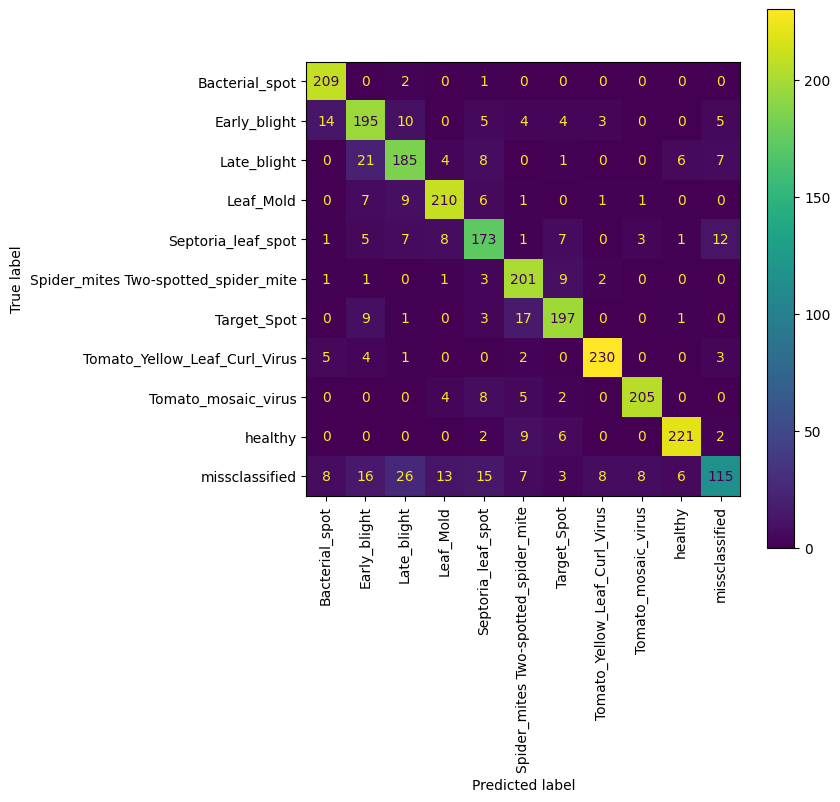

In [95]:
print(classification_report(test_set_tdisease.classes, np.argmax(predictions_tdisease, axis=-1), target_names= test_set_tdisease.class_indices.keys()))

fig, ax = plt.subplots(figsize=(7, 7))

ConfusionMatrixDisplay.from_predictions(test_set_tdisease.classes,np.argmax(predictions_tdisease, axis=-1),display_labels=test_set_tdisease.class_indices.keys(), ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#plt.tight_layout()
#plt.show()
fig.savefig('confusion_matrix_CNN_tomatodiseases_2.png')


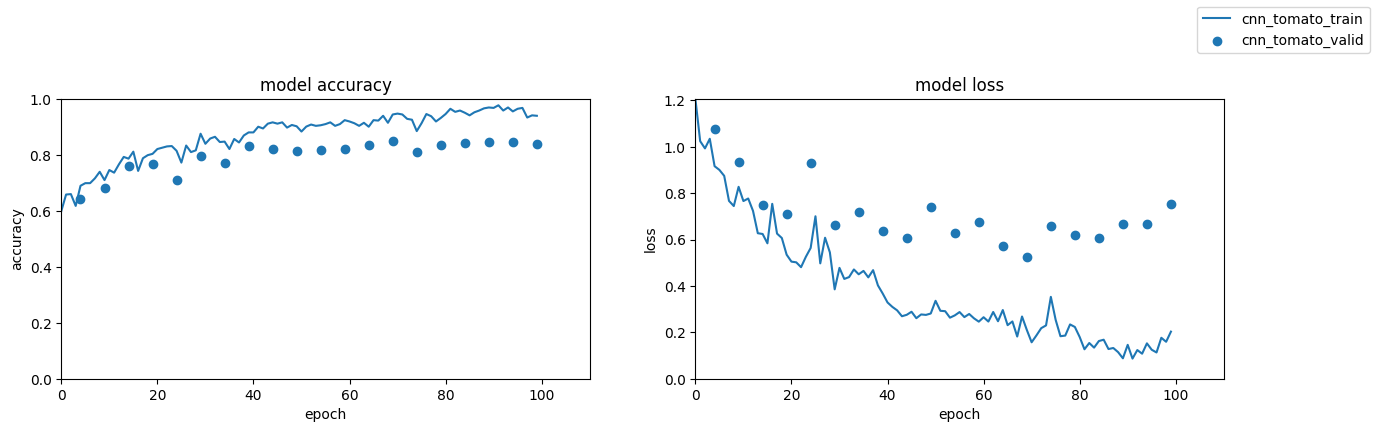

In [96]:
fig = plt.figure(1, figsize = (15,8)) 

ax=fig.add_subplot(221, label="1")

ax.plot(history_tdisease.history['accuracy'], color="C0", label='cnn1_train')
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
ax.set_ylim(0,1)
ax.set_xlim(0,110)

x_acc_val = range(4,(len(history_tdisease.history['val_accuracy']))*5,5)
ax.scatter(x_acc_val, history_tdisease.history['val_accuracy'], color="C0")


ax=fig.add_subplot(222, label="1")
ax.plot(history_tdisease.history['loss'], color="C0", label='cnn1_train')
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
ax.set_ylim(0,max(history_tdisease.history['loss']))
ax.set_xlim(0,110)

x_acc_val = range(4,(len(history_tdisease.history['val_loss'])+1)*5-1,5)
ax.scatter(x_acc_val, history_tdisease.history['val_loss'], color="C0")


fig.legend(['cnn_tomato_train','cnn_tomato_valid']) 
plt.show()

In [90]:
#np.histogram(validation_set_tdisease.classes)#np.argmax(predictions_tdisease, axis=-1))
#plt.hist(validation_set_tdisease.classes, bins =11)

In [91]:
#plt.hist(test_set.classes, bins=38)

## ResNet18 Model

In [101]:
from tensorflow.keras.models import Sequential
!pip install tensorflow_addons
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Softmax,Conv2D,MaxPooling2D,BatchNormalization,Activation
from tensorflow_addons.optimizers import CyclicalLearningRate
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add,SeparableConv2D
from keras.models import Sequential
from keras.models import Model
import tensorflow as tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:01


In [102]:
@tf.autograph.experimental.do_not_convert
class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = SeparableConv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.swish(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.swish(x)
        return out

@tf.autograph.experimental.do_not_convert
class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (3, 3), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        # out = tf.nn.swish(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

In [106]:
resnet18_model = ResNet18(38)
resnet18_model.build(input_shape = (None,256,256,3))

In [107]:
resnet18_model.summary()

Model: "res_net18_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          multiple                  1792      
                                                                 
 batch_normalization_40 (Bat  multiple                 256       
 chNormalization)                                                
                                                                 
 max_pooling2d_17 (MaxPoolin  multiple                 0         
 g2D)                                                            
                                                                 
 resnet_block_16 (ResnetBloc  multiple                 42176     
 k)                                                              
                                                                 
 resnet_block_17 (ResnetBloc  multiple                 42176     
 k)                                                    

In [108]:
cyclical_learning_rate = CyclicalLearningRate(
  initial_learning_rate=3e-7,
  maximal_learning_rate=0.001,
  step_size=len(train_set),
  scale_fn=lambda x: 1 / (2.0 ** (x - 1)),
  scale_mode='cycle')

optimizer = tf.keras.optimizers.Adam(learning_rate = cyclical_learning_rate, clipvalue=0.1)
                                 
resnet18_model.compile(loss="categorical_crossentropy",
                       optimizer =optimizer, metrics=["accuracy"])

In [111]:
path = '/data'
checkpoint_filepath = path  + 'weights.{epoch:02d}-{val_accuracy:.2f}.tf'
resnet18_model_checkpoint_callback = [
    tf.keras.callbacks.ModelCheckpoint(
                                      filepath=checkpoint_filepath,
                                      monitor='val_accuracy',
                                      mode='max',
                                      save_best_only=True,save_format='tf' ) 
    ,

    tf.keras.callbacks.EarlyStopping(
                                  monitor='val_accuracy', min_delta=0,
                                  patience=15, verbose=2, mode='auto',
                                  baseline=None, restore_best_weights=True)
    ,
    # tf.keras.callbacks.ReduceLROnPlateau(
    #                                       monitor="val_accuracy",factor=0.1,
    #                                       patience=10,verbose=0,mode="auto",
    #                                      min_delta=0.0001,cooldown=0,min_lr=0,)
    ]

In [ ]:
tf.random.set_seed(7)
import time
t0 = time.time()
resnet18_history = resnet18_model.fit(x = train_set, 
                                      validation_data = validatßion_set,
                                      epochs = 200,
                                      batch_size=32, 
                                     )#callbacks=[resnet18_model_checkpoint_callback])

print("Training time:", time.time()-t0)

In [171]:
import json
# Get the dictionary containing each metric and the loss for each epoch
resnet18_history_dict = resnet18_history.history

NameError: name 'resnet18_history' is not defined

In [169]:
plt.figure(figsize = (20,10))

acc_final = round(resnet18_history_dict['val_loss'][-1], 3)

# Training Accuracy
plt.subplot(1,2,2)
plt.title('Loss', fontsize=24)
plt.plot(resnet18_history_dict['loss'], label='training')
plt.plot(range(validation_freq-1, no_epochs, validation_freq), 
         resnet18_history_dict['val_loss'], 
         label='validation')
plt.text(5, 3, f'Final Validation Accuracy: {acc_final}', style='italic',
        bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10})
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim((0,4))
plt.legend()

plt.savefig('resnet18_loss.png')
plt.show()

NameError: name 'resnet18_history_dict' is not defined

<Figure size 2000x1000 with 0 Axes>

In [ ]:
plt.figure(figsize = (20,10))

acc_final = round(resnet18_history_dict['val_accuracy'][-1], 3)

# Training Accuracy
plt.subplot(1,2,2)
plt.title('Accuracy', fontsize=24)
plt.plot(resnet18_history_dict['accuracy'], label='training')
plt.plot(range(validation_freq-1, no_epochs, validation_freq), 
         resnet18_history_dict['val_accuracy'], 
         label='validation')
plt.text(5, 0.45, f'Final Validation Accuracy: {acc_final}', style='italic',
        bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10})
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0,1))
plt.legend()

plt.savefig('resnet18_accuracy.png')
plt.show()

In [ ]:
resnet18_scores = model.evaluate(test_set)
print("%s: %.2f%%" % (model.metrics_names[0], resnet18_scores[0]*100))